In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np
import dataframe_image as dfig

xlsx = pd.ExcelFile('../Dados/201901.xlsx')
df = pd.read_excel(xlsx, 'Planilha1')
#df.set_index('Data',inplace=True)
df = df.rename(columns={"Nr. Ordem" : "Nr. Ordem Abast.","Nr." : "Nr. Lcto Fitcard", "Exerc. Empenho" : "Exerc.", "Unnamed: 9" : "Empenho", "Exerc..1" : "Exerc.", "Tipo.1" : "Tipo Nota Fiscal", "Valor" : "Valor Abast."})
#Tirei o valor ajustado para testar a tabela que representa o mês de Janeiro e nela vários valores da coluna Valor Ajustado estão faltando
df = df.drop(["Lcto", "Exerc.", "Lançamento", "Nr. Ordem Abast.", "Nr. Lcto Fitcard", "Empenho", "Tipo Nota Fiscal", "Serie", "EQAL", "Liquidação", "Numero", "Valor Ajustado"], axis = 1)
df["Nr Litros"] = df["Nr Litros"] / 1000
#Renomeia os nomes dos produtos para facilitar o plot de gráficos
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2019,79417,AJM-9211,Abast,GASOLINA,23.200,99.53
1,02/01/2019,79464,BCD-6525,Abast,ETANOL,41.441,115.62
2,02/01/2019,79466,BCD-6527,Abast,ETANOL,46.090,128.59
3,02/01/2019,79432,ARV-7425,Abast,ETANOL,45.168,126.02
4,02/01/2019,79473,AJU-6529,Abast,DIESEL,104.080,363.24
...,...,...,...,...,...,...,...
237,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
238,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
239,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
240,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [2]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201902.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/02/2019,78038,AJA-2563,Abast,DIESEL,100.270,349.95
1,01/02/2019,79434,ARV-7183,Abast,GASOLINA,37.580,153.71
2,01/02/2019,79460,BCD-6869,Abast,GASOLINA,41.570,170.03
3,01/02/2019,79458,BCD-6853,Abast,ETANOL,47.000,117.03
4,01/02/2019,79401,AHT-8827,Abast,GASOLINA,37.081,151.67
...,...,...,...,...,...,...,...
448,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
449,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
450,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
451,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [3]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201903.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Valor        Numero Abast.": "Valor Abast."})
df = df.drop(["Unnamed: 4", "Unnamed: 8"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].str.replace(" ", "")
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/03/2019,79446,ATL-9841,Abast,ETANOL,44.820,134.01
1,01/03/2019,78038,AJA2563,Abast,DIESEL,85.971,291.45
2,01/03/2019,79445,ATL-9829,Abast,GASOLINA,48.841,199.77
3,01/03/2019,79456,BCC-4704,Abast,GASOLINA,49.240,201.40
4,01/03/2019,79433,ARV-7211,Abast,ETANOL,37.759,112.90
...,...,...,...,...,...,...,...
671,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
672,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
673,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
674,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [4]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201904.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento"})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/04/2019,87009,EQU-8709,Consum,GASOLINA,16.140,69.25
1,01/04/2019,79465,BCD-6526,Abast,ETANOL,40.552,121.25
2,01/04/2019,78040,AEO-9326,Abast,DIESEL,106.289,370.96
3,01/04/2019,79450,BAB-6291,Abast,DIESEL,44.610,155.70
4,01/04/2019,79412,AHI-8548,Abast,GASOLINA,35.091,150.55
...,...,...,...,...,...,...,...
922,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
923,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
924,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
925,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [5]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201905.xlsx", sheet_name=None), ignore_index=True)
df["Unnamed: 10"].update(df["Unnamed: 11"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/05/2019,78045,AEQ-0562,Abast,DIESEL,69.310,248.83
1,02/05/2019,87009,EQU-8709,Consum,GASOLINA,19.049,85.54
2,02/05/2019,79446,ATL-9841,Abast,GASOLINA,45.831,205.79
3,02/05/2019,79464,BCD-6525,Abast,GASOLINA,42.731,191.87
4,02/05/2019,93014,ATW-9372,Abast,GASOLINA,7.920,35.57
...,...,...,...,...,...,...,...
1176,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
1177,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
1178,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
1179,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [6]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201906.xlsx", sheet_name=None), ignore_index=True)
df["Unnamed: 15"].update(df["Unnamed: 16"])
df["Unnamed: 10"].update(df["Unnamed: 11"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df = df.drop(["Unnamed: 8", "Lançamento"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,03/06/2019,93018,ATW-9367,Abast,GASOLINA,7.169,32.20
1,03/06/2019,77108,AAW-6887,Abast,GASOLINA,31.570,141.76
2,03/06/2019,79506,AHR-1214,Abast,GASOLINA,35.560,159.67
3,03/06/2019,77109,AAW-6734,Abast,GASOLINA,34.430,154.60
4,03/06/2019,78012,AKF-2842,Abast,DIESEL,102.671,368.60
...,...,...,...,...,...,...,...
1390,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
1391,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
1392,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
1393,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [7]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201907.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Produto"] = df["Produto"].replace("ÁLCOOLCOMBUSTÍVEL(ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEODIESELS-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINACOMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/07/2019,79437,ASZ-7083,Abast,GASOLINA,8.629,37.03
1,01/07/2019,79472,BCG-4255,Abast,DIESEL,51.451,184.72
2,01/07/2019,79468,BCD-6529,Abast,GASOLINA,34.500,148.01
3,01/07/2019,79463,BCD-6524,Abast,GASOLINA,38.720,166.12
4,01/07/2019,93011,ATW-9412,Abast,GASOLINA,5.681,24.38
...,...,...,...,...,...,...,...
1668,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
1669,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
1670,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
1671,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [8]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201908.xlsx", sheet_name=None), ignore_index=True)
df.drop(281, inplace = True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/08/2019,78045.0,AEQ-0562,Abast,DIESEL,100.010,349.04
1,01/08/2019,79447.0,ATL-9887,Abast,ETANOL,44.710,124.75
2,01/08/2019,31041.0,AIA-7621,Abast,DIESEL,92.680,323.46
3,01/08/2019,78012.0,AKF-2842,Abast,DIESEL,145.481,507.74
4,01/08/2019,79473.0,AJU-6529,Abast,DIESEL,85.421,298.13
...,...,...,...,...,...,...,...
1949,31/01/2019,79463.0,BCD-6524,Abast,ETANOL,39.120,97.41
1950,31/01/2019,79422.0,AJN-3794,Abast,GASOLINA,47.350,193.66
1951,31/01/2019,79456.0,BCC-4704,Abast,ETANOL,46.269,115.21
1952,31/01/2019,79450.0,BAB-6291,Abast,DIESEL,47.991,167.49


In [9]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201909.xlsx", sheet_name=None), ignore_index=True)
df["Nr Litros"].update(df["Unnamed: 10"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop(["EQAL", "Exerc.", "Exerc..1"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/09/2019,87009.0,EQU-8709,Consum,GASOLINA,11.451,47.99
1,02/09/2019,31102.0,AZR-9543,Abast,DIESEL,163.000,568.88
2,02/09/2019,79456.0,BCC-4704,Abast,ETANOL,46.820,135.32
3,02/09/2019,79450.0,BAB-6291,Abast,DIESEL,33.691,117.59
4,02/09/2019,77109.0,AAW-6734,Abast,GASOLINA,36.310,152.15
...,...,...,...,...,...,...,...
2209,31/01/2019,79463.0,BCD-6524,Abast,ETANOL,39.120,97.41
2210,31/01/2019,79422.0,AJN-3794,Abast,GASOLINA,47.350,193.66
2211,31/01/2019,79456.0,BCC-4704,Abast,ETANOL,46.269,115.21
2212,31/01/2019,79450.0,BAB-6291,Abast,DIESEL,47.991,167.49


In [10]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201910.xlsx", sheet_name=None), ignore_index=True)
df["Nr Litros"].update(df["Unnamed: 10"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
#df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Produto"] = df["Produto"].replace("ÁLCOOLCOMBUSTÍVEL(ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEODIESELS-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINACOMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/10/2019,92046.0,ALE-6725,Abast,GASOLINA,52.600,225.66
1,01/10/2019,79436.0,ASZ-6988,Abast,GASOLINA,8.590,36.86
2,01/10/2019,77100.0,AAW-2751,Abast,GASOLINA,34.110,146.34
3,01/10/2019,79412.0,AHI-8548,Abast,GASOLINA,42.600,182.76
4,01/10/2019,79460.0,BCD-6869,Abast,GASOLINA,44.392,177.52
...,...,...,...,...,...,...,...
2512,31/01/2019,79463.0,BCD-6524,Abast,ETANOL,39.120,97.41
2513,31/01/2019,79422.0,AJN-3794,Abast,GASOLINA,47.350,193.66
2514,31/01/2019,79456.0,BCC-4704,Abast,ETANOL,46.269,115.21
2515,31/01/2019,79450.0,BAB-6291,Abast,DIESEL,47.991,167.49


In [11]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201911.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df = df.drop(["Unnamed: 8", "Lançamento"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Produto"] = df["Produto"].replace("ÁLCOOLCOMBUSTÍVEL(ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEODIESELS-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINACOMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/11/2019,79467.0,BCD-6528,Abast,ETANOL,44.560,133.24
1,01/11/2019,79459.0,BCD-6855,Abast,ETANOL,45.301,135.46
2,01/11/2019,79456.0,BCC-4704,Abast,ETANOL,39.301,117.52
3,01/11/2019,79433.0,ARV-7211,Abast,ETANOL,43.472,129.99
4,01/11/2019,79506.0,AHR-1214,Abast,GASOLINA,29.580,126.91
...,...,...,...,...,...,...,...
2776,31/01/2019,79463.0,BCD-6524,Abast,ETANOL,39.120,97.41
2777,31/01/2019,79422.0,AJN-3794,Abast,GASOLINA,47.350,193.66
2778,31/01/2019,79456.0,BCC-4704,Abast,ETANOL,46.269,115.21
2779,31/01/2019,79450.0,BAB-6291,Abast,DIESEL,47.991,167.49


In [12]:
dh = df
df = pd.concat(pd.read_excel("../Dados/201912.xlsx", sheet_name=None), ignore_index=True)
df["Nr Litros"].update(df["Unnamed: 10"])
#df["Unnamed: 10"].update(df["Unnamed: 11"])
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/12/2019,87009.0,EQU-8709,Consum,GASOLINA,18.620,83.61
1,02/12/2019,78040.0,AEO-9326,Abast,DIESEL,89.550,330.45
2,02/12/2019,79472.0,BCG-4255,Abast,DIESEL,46.371,171.12
3,02/12/2019,87011.0,EQU-8711,Abast,DIESEL,16.290,60.12
4,02/12/2019,79450.0,BAB-6291,Abast,DIESEL,38.070,140.49
...,...,...,...,...,...,...,...
3014,31/01/2019,79463.0,BCD-6524,Abast,ETANOL,39.120,97.41
3015,31/01/2019,79422.0,AJN-3794,Abast,GASOLINA,47.350,193.66
3016,31/01/2019,79456.0,BCC-4704,Abast,ETANOL,46.269,115.21
3017,31/01/2019,79450.0,BAB-6291,Abast,DIESEL,47.991,167.49


In [13]:
#Correction, as some Plates appear as XXXAXAX and XXX-AXAX
df['Placa'] = df['Placa'].str.replace('-', '')
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/12/2019,87009.0,EQU8709,Consum,GASOLINA,18.620,83.61
1,02/12/2019,78040.0,AEO9326,Abast,DIESEL,89.550,330.45
2,02/12/2019,79472.0,BCG4255,Abast,DIESEL,46.371,171.12
3,02/12/2019,87011.0,EQU8711,Abast,DIESEL,16.290,60.12
4,02/12/2019,79450.0,BAB6291,Abast,DIESEL,38.070,140.49
...,...,...,...,...,...,...,...
3014,31/01/2019,79463.0,BCD6524,Abast,ETANOL,39.120,97.41
3015,31/01/2019,79422.0,AJN3794,Abast,GASOLINA,47.350,193.66
3016,31/01/2019,79456.0,BCC4704,Abast,ETANOL,46.269,115.21
3017,31/01/2019,79450.0,BAB6291,Abast,DIESEL,47.991,167.49


In [14]:
#Creates Excel file
#df.to_excel("../Dados/2019.xlsx")

In [15]:
from pandas_profiling import ProfileReport

profile = df.profile_report(
      sort='ascending',
      vars={
          'num':{'low_categorical_threshold': 0},
          'cat':{
            'length':True,
            'unicode':False,
            'n_obs': 5,
          }
      }
)

profile.set_variable('variables.descriptions',
    {
      'files': 'Files in the filesystem',
      'datec': 'Creation date',
      'datem': 'Modification date',
    }
)

profile.to_file("../Pandas_Profiling/2019-PP.html")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [16]:
from pivottablejs import pivot_ui

pivot_ui(df, outfile_path='../PivottableJS/2019-PJS.html')

In [17]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

48.78770785028154

In [18]:
# Number of unique vehicles
dftv = df.groupby('Placa').size().reset_index().rename(columns={0: 'Total'})
dftv = dftv.sort_values(by='Total', ascending=False)
dftv
#dfig.export(dftv,'maxCountVehicles.png', max_rows=10)

,Placa,Total
27,AKF2842,103
25,AJU6529,101
64,BCD6523,81
38,ASZ7083,75
67,BCD6526,75
...,...,...
92,EQU8715,2
6,ABY1062,1
91,EQU8714,1
93,EQU8718,1


In [19]:
dfrv = df.groupby(['Data', 'Placa']).size().reset_index().rename(columns={0: 'Total'})
dfrv = dfrv[dfrv['Total'] > 1]
dfrv

,Data,Placa,Total


In [20]:
dfrv = df.groupby(['Placa']).size().reset_index().rename(columns={0: 'Total'})
dfrv

,Placa,Total
0,AAW2629,14
1,AAW2751,17
2,AAW6734,12
3,AAW6736,15
4,AAW6742,27
...,...,...
90,EQU8713,14
91,EQU8714,1
92,EQU8715,2
93,EQU8718,1


In [21]:
dfbd = df[df['Data'] == '08/07/2019'].groupby('Placa').size().reset_index().rename(columns={0: 'Total'})
dfbd
dfig.export(dfbd, 'flexVehicles.png', max_rows=10)

In [22]:
dfmt = df.groupby(['Placa']).agg(Máximo=('Nr Litros','max'), Média=('Nr Litros','mean'), Desvio=('Nr Litros', 'std')).reset_index()
dfmt['Média'] = dfmt['Média'].round(0)
dfmt['Máximo'] = dfmt['Máximo'].round(0)
dfmt['Desvio'] = dfmt['Desvio'].round(0)
dfmt['Diferença'] = dfmt['Máximo'] - dfmt['Média']
dfmt = dfmt.fillna(0)
dfmt.sort_values(by='Diferença', ascending=False)
#dfig.export(dfmt.sort_values(by='Diferença', ascending=False), 'refuelDiff.png', max_rows=10)
dfmt = dfmt[dfmt['Diferença'] != 0.0]
dfmt = dfmt[dfmt['Desvio'] != 0.0]
(dfmt['Diferença'] / dfmt['Desvio'])

0     1.500000
1     1.166667
2     1.200000
3     2.000000
4     1.750000
        ...   
86    2.500000
87    1.000000
88    1.666667
90    2.500000
92    0.636364
Length: 89, dtype: float64

In [23]:
dfi = df
dfi['Data'] = pd.to_datetime(dfi['Data'])
dfi['Data'] = dfi['Data'].dt.strftime('%Y/%m/%d')
dfi['Data'] = pd.to_datetime(dfi['Data'])
dfi = dfi.sort_values(by='Data')
dfi['Intervalo'] = dfi.groupby('Placa')['Data'].diff().dt.days
dfi = dfi.fillna(0)
dfi = dfi[dfi['Intervalo'] != 0]
dfi = dfi.groupby(['Placa']).agg({'Intervalo': 'mean'}).round(0).sort_values(by='Intervalo', ascending=False).reset_index()
#dfig.export(dfi, 'idleTime.png', max_rows=10)
dfi

,Placa,Intervalo
0,AHR1579,132.0
1,EQU8715,122.0
2,BDL0C63,52.0
3,BDI6E74,43.0
4,ATW9367,40.0
...,...,...
86,BCD6526,5.0
87,BCD6525,5.0
88,BCC4702,5.0
89,AKF2842,3.0


In [24]:
dfTest = df.groupby('Placa').agg({'Valor Abast.' : 'sum'})
dfTest

,Valor Abast.
Placa,
AAW2629,2903.51
AAW2751,2381.73
AAW6734,1743.49
AAW6736,2377.73
AAW6742,4108.04
...,...
EQU8713,1204.44
EQU8714,147.61
EQU8715,321.77


In [25]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
1852,2019-03-05,79435.0,ASZ6991,Abast,GASOLINA,2.530,11.37
1508,2019-07-18,93011.0,ATW9412,Abast,GASOLINA,2.800,11.74
2916,2019-01-21,87010.0,EQU8710,Consum,GASOLINA,4.279,17.93
2559,2019-03-29,79438.0,ASZ7061,Abast,GASOLINA,4.840,20.77
2474,2019-03-20,87010.0,EQU8710,Consum,GASOLINA,5.000,21.46
...,...,...,...,...,...,...,...
445,2019-11-23,79474.0,EQU4283,Abast,DIESEL,216.821,800.08
207,2019-12-26,79474.0,EQU4283,Abast,DIESEL,220.000,855.80
1452,2019-09-07,31050.0,ABY1062,Abast,DIESEL,223.000,800.58
793,2019-10-30,31093.0,AZL3509,Abast,DIESEL,232.000,856.08


In [26]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
288,2019-06-11,31093.0,AZL3509,Abast,DIESEL,233.030,859.89
793,2019-10-30,31093.0,AZL3509,Abast,DIESEL,232.000,856.08
1452,2019-09-07,31050.0,ABY1062,Abast,DIESEL,223.000,800.58
207,2019-12-26,79474.0,EQU4283,Abast,DIESEL,220.000,855.80
445,2019-11-23,79474.0,EQU4283,Abast,DIESEL,216.821,800.08
...,...,...,...,...,...,...,...
279,2019-05-11,79446.0,ATL9841,Abast,ETANOL,48.819,145.98
1914,2019-05-13,79454.0,BCC4702,Abast,ETANOL,48.817,141.08
328,2019-11-11,79468.0,BCD6529,Abast,ETANOL,48.810,150.83
693,2019-10-21,79453.0,BCC4701,Abast,ETANOL,48.810,145.95


In [27]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
1157,2019-12-08,79421.0,AJN3792,Abast,GASOLINA,60.599,259.98
2154,2019-08-04,79421.0,AJN3792,Abast,GASOLINA,58.581,257.18
2327,2019-04-29,79421.0,AJN3792,Abast,GASOLINA,58.550,262.89
2897,2019-01-17,79421.0,AJN3792,Abast,GASOLINA,58.360,244.53
1017,2019-09-25,79421.0,AJN3792,Abast,GASOLINA,57.730,247.67
...,...,...,...,...,...,...,...
1758,2019-06-18,92046.0,ALE6725,Abast,GASOLINA,49.221,216.09
2580,2019-04-02,77097.0,AAW2629,Abast,GASOLINA,49.150,201.03
852,2019-06-09,79421.0,AJN3792,Abast,GASOLINA,48.981,201.31
2305,2019-04-26,79445.0,ATL9829,Abast,GASOLINA,48.931,219.70


In [28]:
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']

In [29]:
# Check if there is a vehicle that uses 'ETANOL' and 'DIESEL'
dfc = dfd.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft

,,Valor Abast.,Nr Litros
Placa,Produto,,


In [30]:
# Check if there is a vehicle that uses 'GASOLINA' and 'DIESEL'
dfc = dfd.merge(dfg['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})

In [31]:
# Check if there is vehicles that use 'GASOLINA' and 'ETANOL'
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']
dfc = dfg.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dft = dfc.groupby(['Placa', 'Produto']).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft['Valor Litro'] = dft['Valor Abast.'] / dft['Nr Litros']
dft['Valor Litro'] = dft['Valor Litro'].round(2)
dft = dft.reset_index()
dfig.export(dft, 'flexVehicles.png', max_rows=10)
dft

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
0,AMN4156,ETANOL,225.34,78.636,2.87
1,AMN4156,GASOLINA,3669.57,859.477,4.27
2,AQV4640,ETANOL,2198.60,761.940,2.89
3,AQV4640,GASOLINA,516.60,119.501,4.32
4,ARV7183,ETANOL,1671.99,568.209,2.94
...,...,...,...,...,...
63,BCD6855,GASOLINA,857.04,192.770,4.45
64,BCD6869,ETANOL,251.85,87.140,2.89
65,BCD6869,GASOLINA,3644.23,857.041,4.25
66,BCD6871,ETANOL,4737.20,1635.080,2.90


In [32]:
dft.sort_values(by="Nr Litros", ascending=False).head(20)

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
42,BCD6523,ETANOL,8812.48,3003.476,2.93
16,ATL9841,ETANOL,7967.92,2725.395,2.92
48,BCD6526,ETANOL,7834.95,2692.239,2.91
44,BCD6524,ETANOL,7632.51,2598.793,2.94
34,BCC4702,ETANOL,7440.21,2581.217,2.88
50,BCD6527,ETANOL,7403.98,2534.980,2.92
30,BCC4699,ETANOL,7492.37,2518.388,2.98
46,BCD6525,ETANOL,7062.11,2397.880,2.95
18,ATL9887,ETANOL,6819.41,2335.349,2.92
54,BCD6529,ETANOL,6743.11,2323.616,2.90


In [33]:
dfw = df[df['Produto'] == 'GASOLINA']
dfw['Data'] = pd.to_datetime(df['Data'])
dfw = dfw.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfw['Valor Litro'] = dfw['Valor Abast.'] / dfw['Nr Litros']
dfw = dfw.rename(columns={'Nr Frota' : 'Abastecimentos'})
dfw['Data'] = dfw.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
dfwe = df[df['Produto'] == 'ETANOL']
dfwe['Data'] = pd.to_datetime(df['Data'])
dfwe = dfwe.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfwe = dfwe.rename(columns={'Nr Frota':'Abastecimentos'})
dfwe['Valor Abast.'] = dfwe['Valor Abast.'].fillna(dfwe['Valor Abast.'])
dfwe['Nr Litros'] = dfwe['Nr Litros'].fillna(dfwe['Nr Litros'])
dfwe['Valor Litro'] = dfwe['Valor Abast.'] / dfwe['Nr Litros']
dfwe = dfwe.fillna(0)
dfwe['Data'] = dfwe.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
dfwd = df[df['Produto'] == 'DIESEL']
dfwd['Data'] = pd.to_datetime(df['Data'])
dfwd = dfwd.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfwd = dfwd.rename(columns={'Nr Frota':'Abastecimentos'})
dfwd['Valor Abast.'] = dfwd['Valor Abast.'].fillna(dfwd['Valor Abast.'])
dfwd['Nr Litros'] = dfwd['Nr Litros'].fillna(dfwd['Nr Litros'])
dfwd['Valor Litro'] = dfwd['Valor Abast.'] / dfwd['Nr Litros']
dfwd = dfwd.fillna(0)
dfwd['Data'] = dfwd.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_point = dfw
df_point['Compensa'] = df_point['Valor Litro'] * 0.7

In [37]:
dfwe['Valor Litro'] = dfwe['Valor Litro'].where(dfwe['Abastecimentos'] != 0, dfwe['Valor Litro'].mean())

In [38]:
dfwTest = dfwe
#dfwTest = pd.concat([dfwTest, df_point], ignore_index=True)
dfwTest

,Valor Abast.,Nr Litros,Abastecimentos,Valor Litro,Data
Data,,,,,
2019-01-06,1783.86,617.429,15,2.889174,2019-01-06
2019-01-13,1729.58,598.222,14,2.891201,2019-01-13
2019-01-20,3527.35,1311.294,30,2.689976,2019-01-20
2019-01-27,3243.78,1249.119,29,2.596854,2019-01-27
2019-02-03,3113.00,1192.500,27,2.610482,2019-02-03
2019-02-10,2013.64,692.027,16,2.909771,2019-02-10
2019-02-17,2963.99,1052.879,23,2.815129,2019-02-17
2019-02-24,2877.33,1047.862,24,2.745905,2019-02-24
2019-03-03,2925.85,1005.228,23,2.910633,2019-03-03


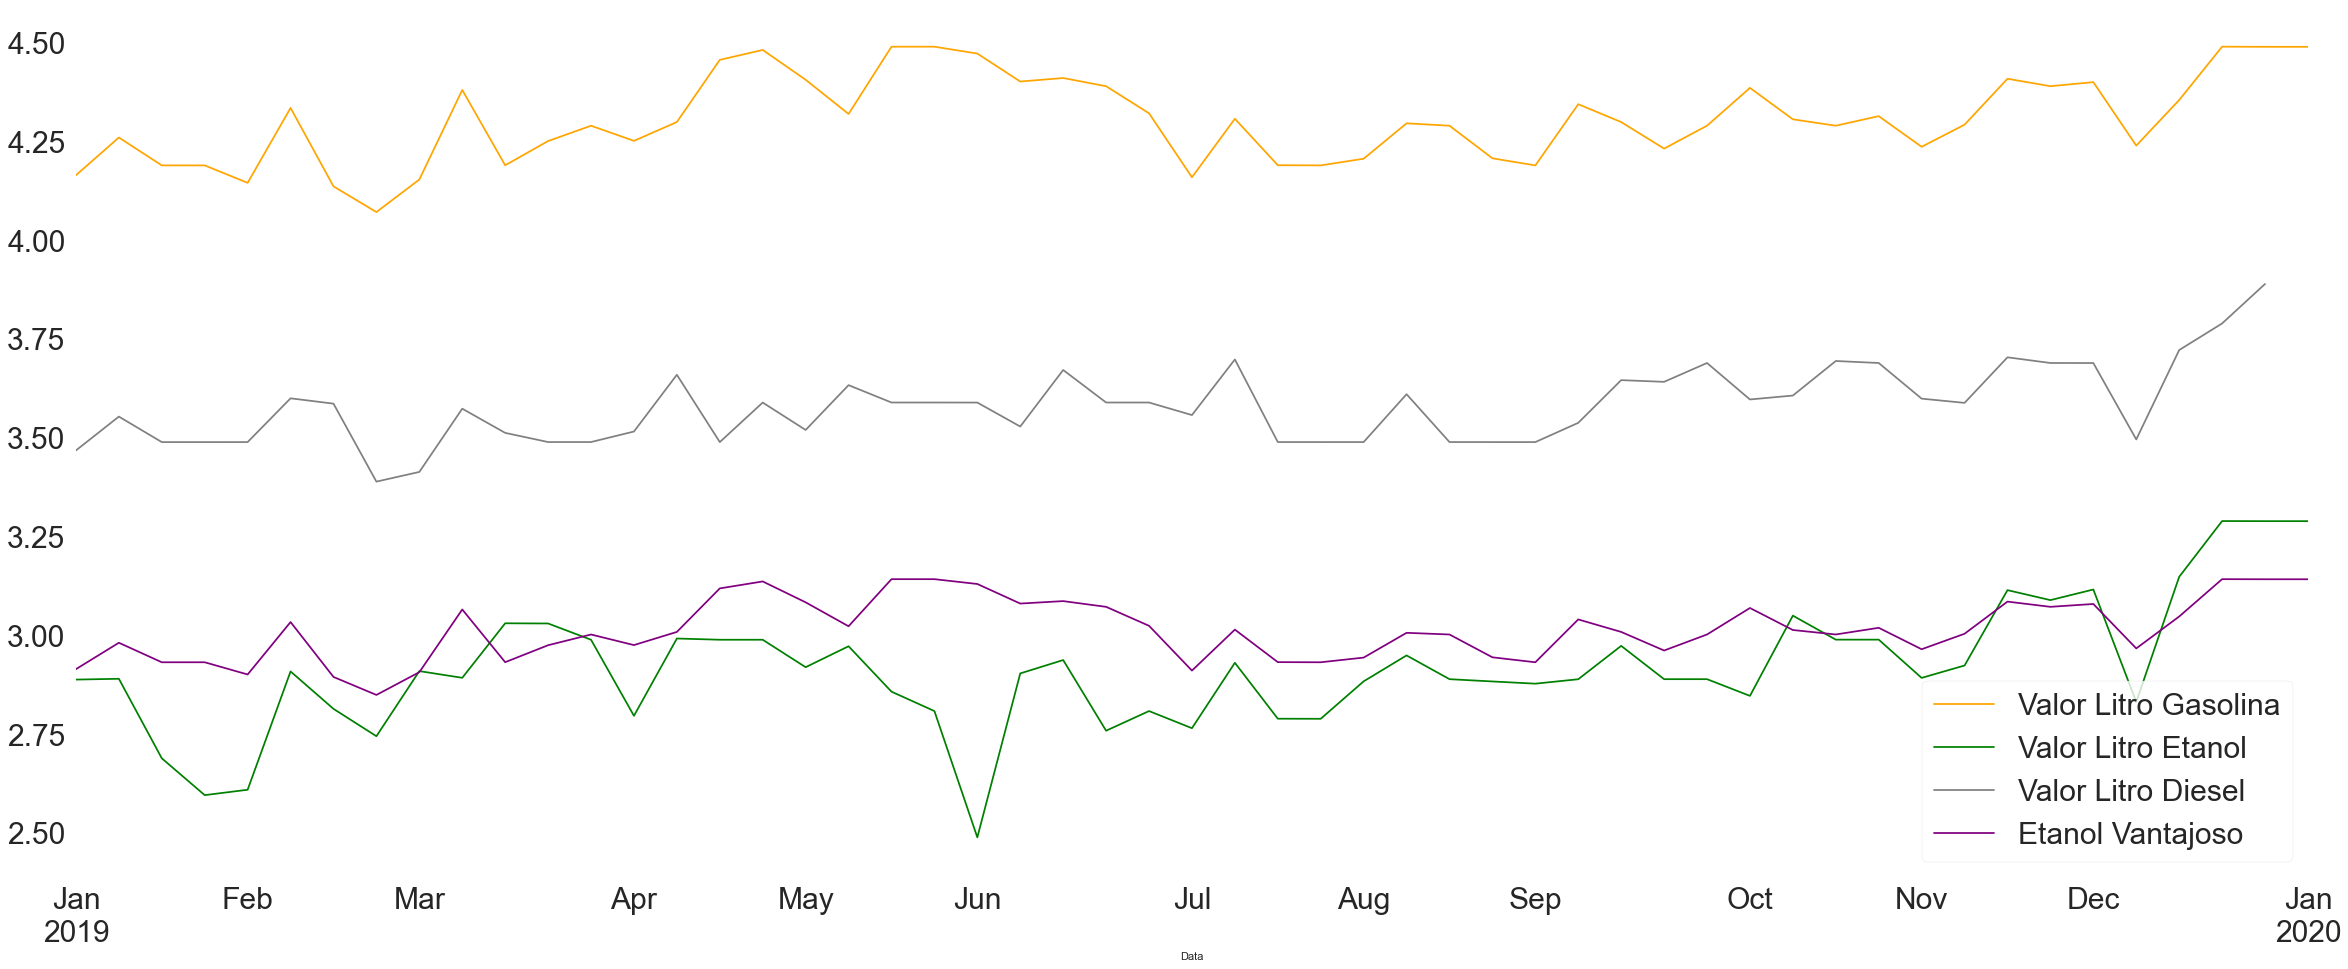

In [39]:
plt.rcParams.update({'font.size': 30, 'figure.figsize': (40, 16), 'ytick.labelsize': 30, 'xtick.labelsize': 30, 'legend.fontsize': 30})
ax = plt.gca()
dfw.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='orange')
dfwe.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='green')
dfwd.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='grey')
df_point.plot(kind='line', x = "Data", y = "Compensa", ax=ax, color='purple')
ax.legend(["Valor Litro Gasolina", "Valor Litro Etanol", 'Valor Litro Diesel', "Etanol Vantajoso"])
plt.savefig('movingAverage.png', dpi=72)

<AxesSubplot:xlabel='Data'>

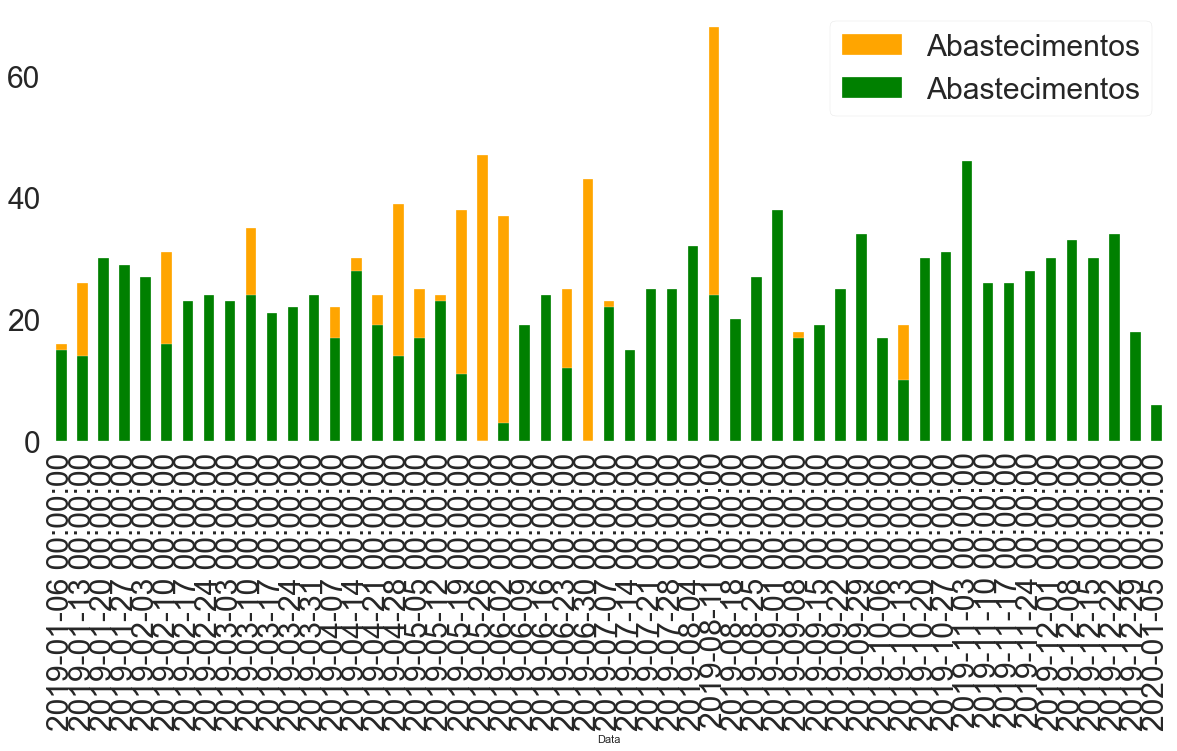

In [40]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
dfw.plot(kind='bar', x = "Data", y = "Abastecimentos", ax=ax, color='orange')
dfwe.plot(kind='bar', x = "Data", y = "Abastecimentos", ax=ax, color='green')

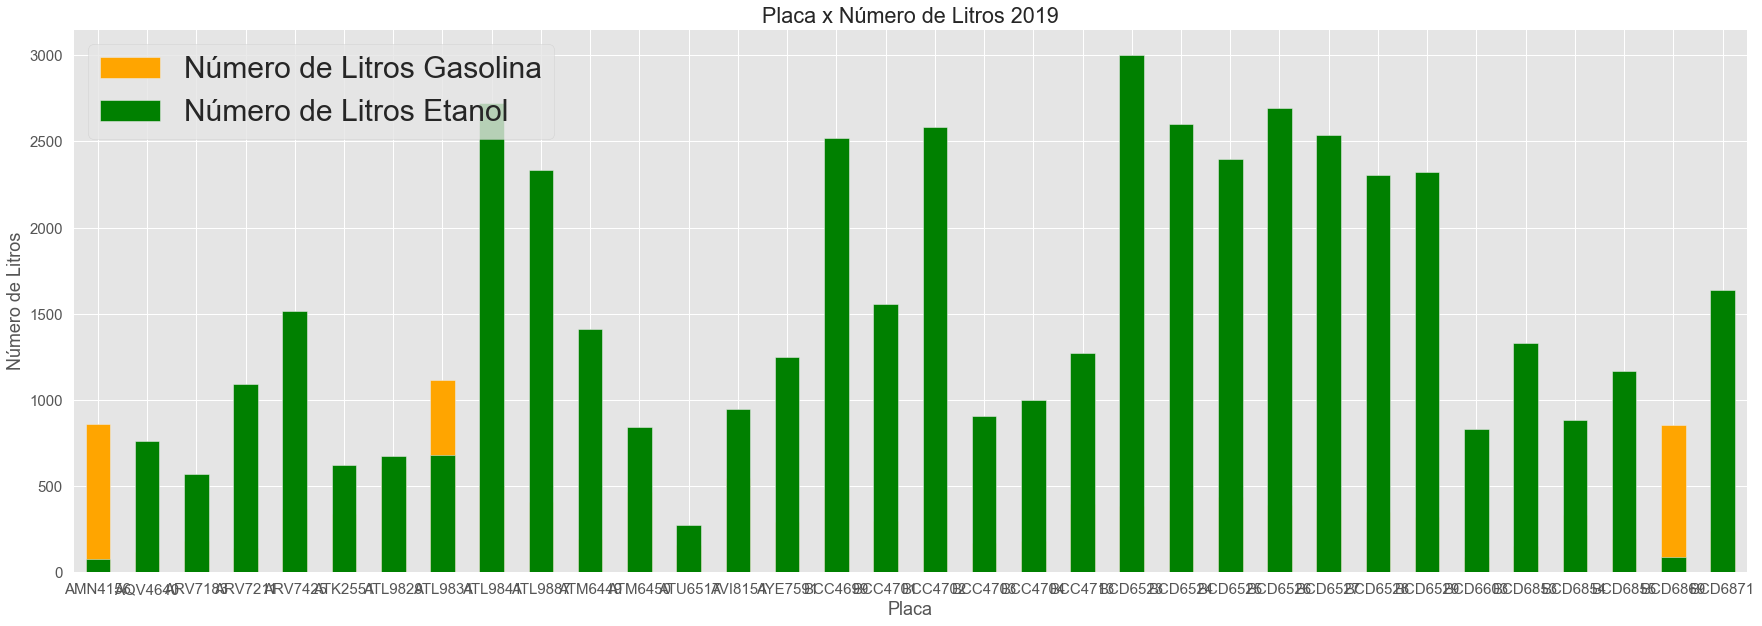

In [41]:
#set ggplot style
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15, 'figure.figsize': (30, 15)})

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(30, 10), color=("orange"))
dftpe.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(30, 10), color='green')

#set limits and labels
#avggas = dftpg["Valor Litro"].mean()
#ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
#avgeta = dftpg["Valor Litro"].mean()
#ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
ax.legend(["Número de Litros Gasolina", "Número de Litros Etanol", "Valor por Litro Gasolina"])
ax.set(title='Placa x Número de Litros 2019', xlabel='Placa', ylabel='Número de Litros')
plt.savefig('plateXnrLiters.png', dpi=72)

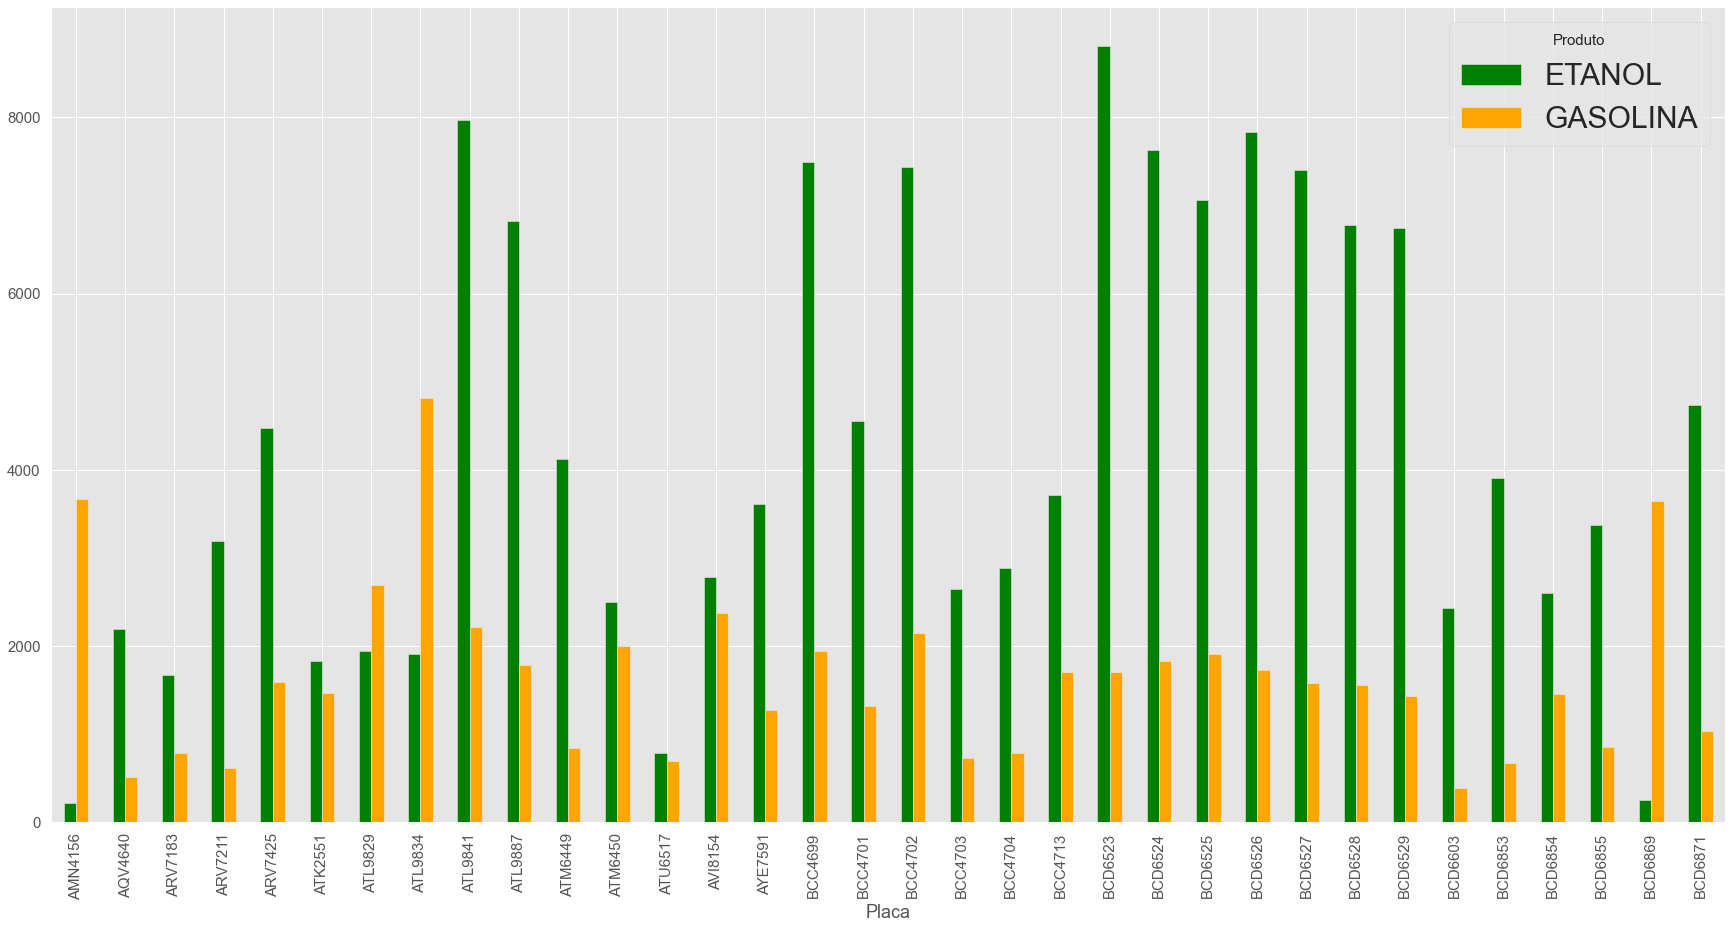

In [42]:
dft.groupby(['Placa', 'Produto'])['Valor Abast.'].mean().unstack().plot.bar(color=['green', 'orange'])
plt.savefig('plateXvalue.png')

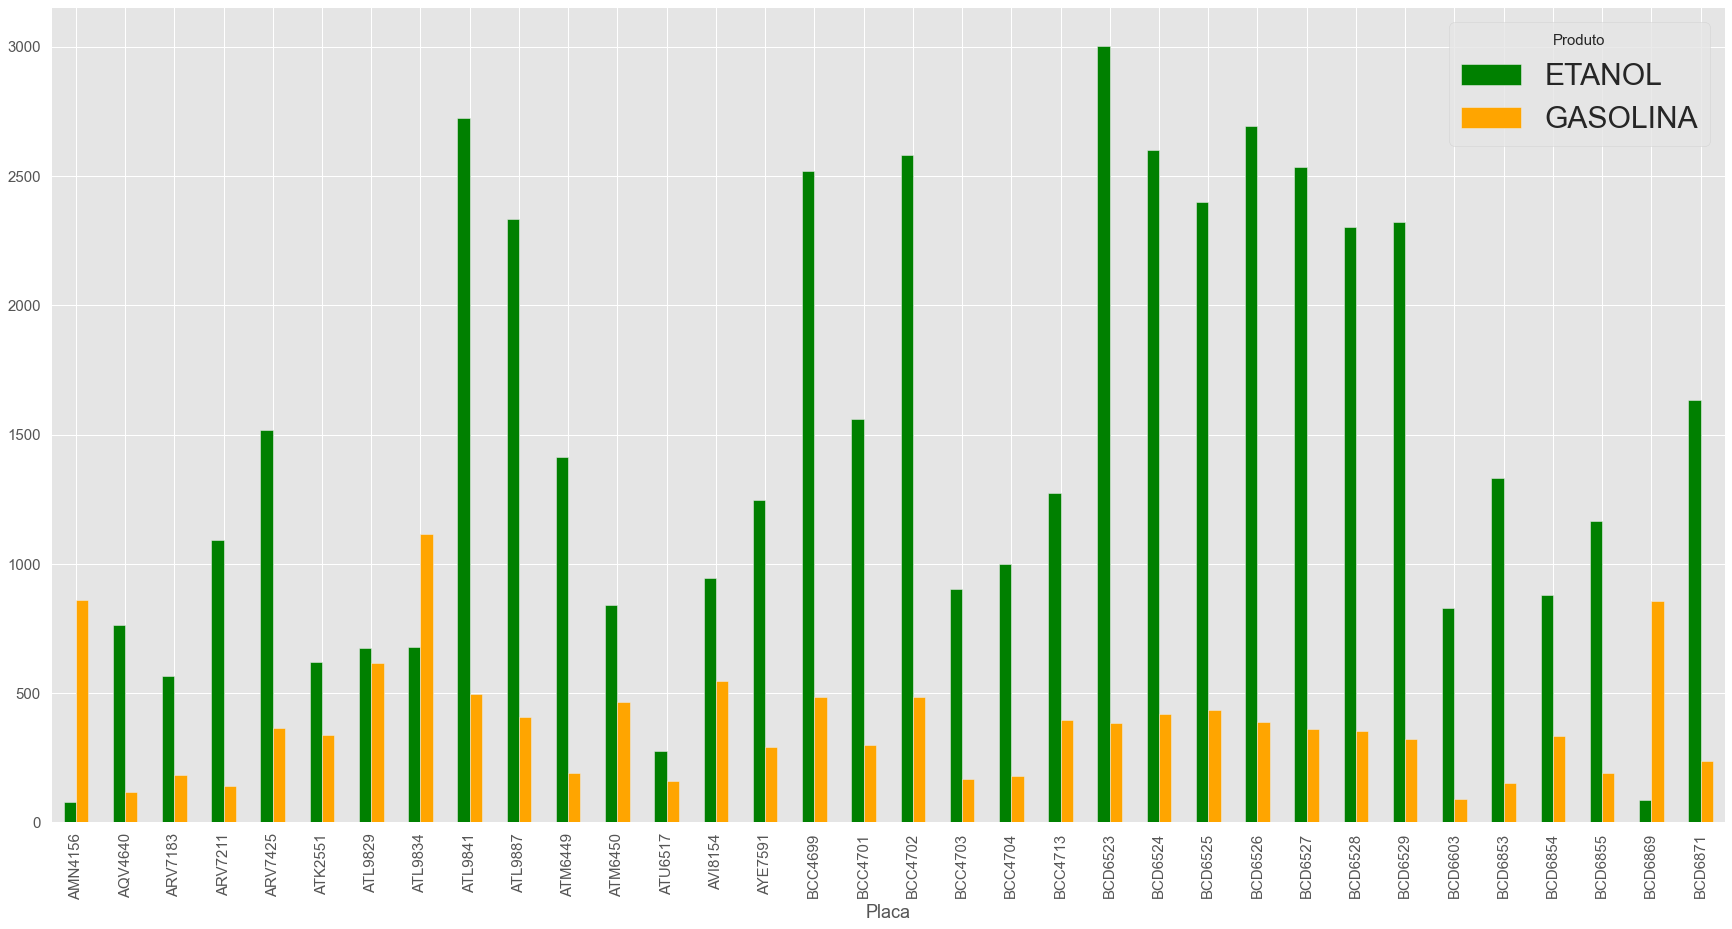

In [43]:
dft.groupby(['Placa', 'Produto'])['Nr Litros'].mean().unstack().plot.bar(color=['green', 'orange'])
plt.savefig('plateXnrLiters.png', dpi=72)

In [44]:
#test = dft[dft['Placa'] == 'ATL9829']
#test

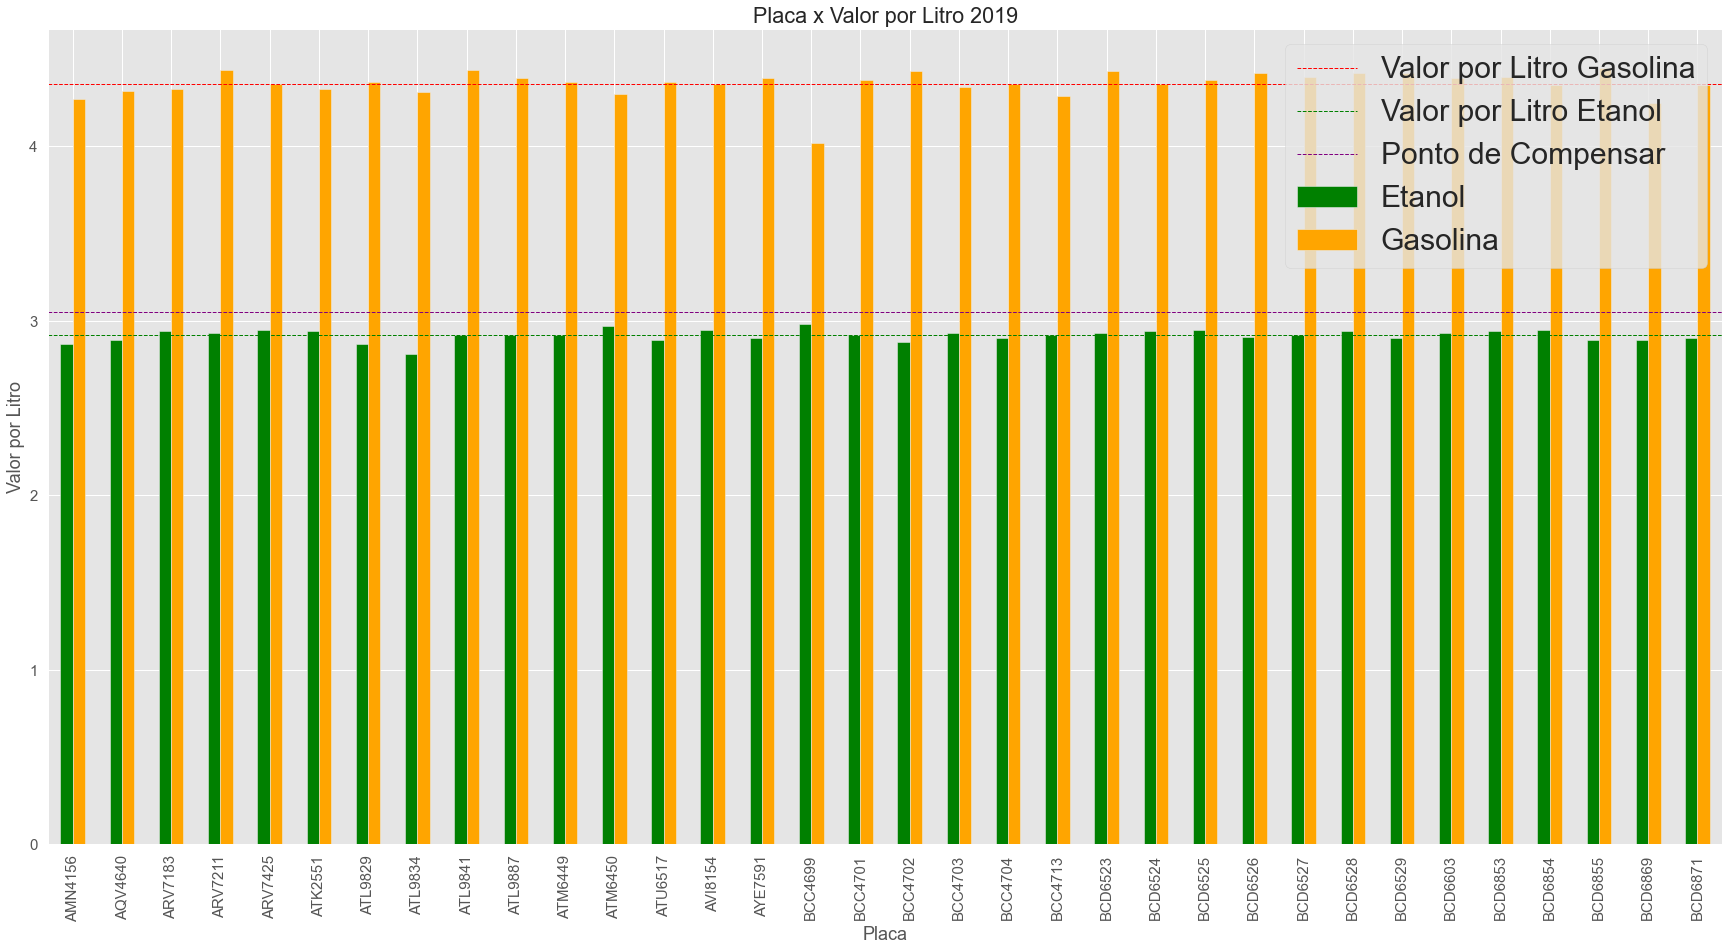

In [45]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15, 'figure.figsize': (30, 18)})
dft.groupby(['Placa', 'Produto'])['Valor Litro'].mean().unstack().plot(kind="bar", ax=ax, color=['g', 'orange'])

avggas = dftpg["Valor Litro"].mean()
ax.axhline(avggas, color='r', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axhline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axhline(worthGas, color='purple', label='Média', linestyle='--', linewidth=1)
ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Etanol', 'Gasolina'])
ax.set(title='Placa x Valor por Litro 2019', xlabel='Placa', ylabel='Valor por Litro')
plt.savefig('plateXvaluePerLiter.png', dpi=72)

In [46]:
from datetime import datetime
#test = df[df['Produto'] == 'GASOLINA']
#df[df['Produto'] == 'DIESEL']
#test = df.query('Produto == "GASOLINA" | Produto == "ETANOL"')
testGas = df.query('Produto == "GASOLINA"')
testEta = df.query('Produto == "ETANOL"')
#df3 = df[testGas['Placa'].isin(testEta['Placa'])]
testGas = testGas[testGas['Placa'].isin(testEta['Placa'])].reset_index(drop=True)
testEta = testEta[testEta['Placa'].isin(testGas['Placa'])].reset_index(drop=True)
res = testGas
res = pd.concat([res, testEta], ignore_index=True)
res['Valor Litro'] = (res['Valor Abast.'] / res['Nr Litros']).round(2)

flexEtanol = res.query('Produto == "ETANOL"')
flexGas = res.query('Produto == "GASOLINA"')
flexGas['Worth'] = flexGas['Valor Litro'] * 0.7
#flexGas = flexGas['Valor Litro'] * 0.7 > worthGas
idx = pd.date_range('2019-01-01', '2019-12-31')
mean = flexEtanol['Valor Litro'].mean()

testEtanol = pd.merge(left=flexGas, left_on='Data',
         right=flexEtanol, right_on='Data').drop_duplicates('Data').reset_index()
testEtanol

def functionTest(currentPlate):
    for index, row in testEtanol.iterrows():
        if(str(row['Data']).split()[0] == str(currentPlate).split()[0]):
            return(row['Valor Litro_y'])

def mapGas():
    for index, row in flexGas.iterrows():
        if(row['Etanol'] == True):
            flexGas.at[index, 'Etanol'] = functionTest(flexGas.at[index, 'Data'])

pd.set_option('display.max_rows', 1500)

flexGas = flexGas.assign(Etanol = flexGas['Data'].isin(flexEtanol['Data']))
flexGas['Etanol'] = np.where(flexGas['Etanol'] == False, round(mean, 2), True)
mapGas()
flexGas['Problema'] = (flexGas['Valor Litro'] > flexGas['Worth']) & (flexGas['Worth'] > flexGas['Etanol'])

#flexEtanol = flexEtanol['Valor Litro'] > worthGas
#flexEtanol

#totalCount = flexGas.value_counts() + flexEtanol.value_counts()
#totalCount

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [47]:
def functionTest(currentPlate):
    for index, row in testEtanol.iterrows():
        if(str(row['Data']).split()[0] == str(currentPlate).split()[0]):
            return(round(row['Valor Litro_x'] * 0.7, 2))

def mapGas():
    for index, row in flexEtanol.iterrows():
        if(row['Gas'] == True):
            flexEtanol.at[index, 'Worth'] = functionTest(flexEtanol.at[index, 'Data'])

Gas = res.query('Produto == "GASOLINA"')
mean = round(Gas['Valor Litro'].mean() * 0.7, 2)
flexEtanol = flexEtanol.assign(Gas = flexEtanol['Data'].isin(flexGas['Data']))
flexEtanol['Worth'] = np.where(flexEtanol['Gas'] == False, round(mean, 2), True)
mapGas()

flexEtanol['Problema'] = flexEtanol['Valor Litro'] > flexEtanol['Worth']

isProblem = flexGas[flexGas['Problema'] == True]
noProblem = flexGas[flexGas['Problema'] == False]

isProblemEtanol = flexEtanol[flexEtanol['Problema'] == True]
noProblemEtanol = flexEtanol[flexEtanol['Problema'] == False]

lineIsProblemEtanol = pd.concat([isProblemEtanol, isProblem])
lineNoProblemEtanol = pd.concat([noProblemEtanol, noProblem])

# START CALCULATING VALUES

#value = lineIsProblemEtanol['Valor Abast.'].sum()

#value

#lineIsProblemEtanol['Etanol'] = lineIsProblemEtanol['Etanol'].fillna(lineIsProblemEtanol['Valor Litro'])
#lineIsProblemEtanol['Worth'] = lineIsProblemEtanol[['Worth', 'Etanol']].min(axis=1)
#lineIsProblemEtanol['Valor Worth'] = lineIsProblemEtanol['Nr Litros'] * lineIsProblemEtanol['Worth']
#lineIsProblemEtanol['Valor Abast.'].sum() - lineIsProblemEtanol['Valor Worth'].sum() 

#noProblemEtanol['Valor Abast.'].sum() - isProblemEtanol['Valor Abast.'].sum()

# STOP CALCULATING VALUES

#lineNoProblemEtanol = lineNoProblemEtanol.groupby(pd.Grouper(key='Data', freq='W')).agg({'Problema' : 'count'})
#lineNoProblemEtanol['Data'] = lineNoProblemEtanol.index

#lineIsProblemEtanol = lineIsProblemEtanol.groupby(pd.Grouper(key='Data', freq='W')).agg({'Problema' : 'count'})
#lineIsProblemEtanol['Data'] = lineIsProblemEtanol.index

#plt.rcParams.update({'font.size': 30, 'figure.figsize': (40, 16), 'ytick.labelsize': 30, 'xtick.labelsize': 30, 'legend.fontsize': 30})
#ax = plt.gca()
#lineIsProblemEtanol.plot(kind='line', x = "Data", y = "Problema", ax=ax, color='red')
#lineNoProblemEtanol.plot(kind='line', x = "Data", y = "Problema", ax=ax, color='green')

#ax.legend(["Não Vantajoso", "Vantajoso"])
#plt.savefig('worthAverage.png', dpi=72)

In [48]:
#test = res[res['Valor Litro'] > worthGas]
aboveGas = flexGas[flexGas['Valor Litro'] * 0.7 > worthGas]
aboveEtanol = flexEtanol[flexEtanol['Valor Litro'] > worthGas]
total = aboveGas['Valor Abast.'].sum() + aboveEtanol['Valor Abast.'].sum()
total.round(2)

61104.86

In [49]:
#test.value_counts()
#sizes = flexGas.value_counts() + flexEtanol.value_counts()

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels = ['Vantajoso', 'Não vantajoso'], autopct = '%1.1f%%',shadow = True, startangle=90, colors=['green', 'red'])
#ax1.axis('equal')
#plt.show()

[Text(0.5, 1.0, 'Placa x Valor por Litro 2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

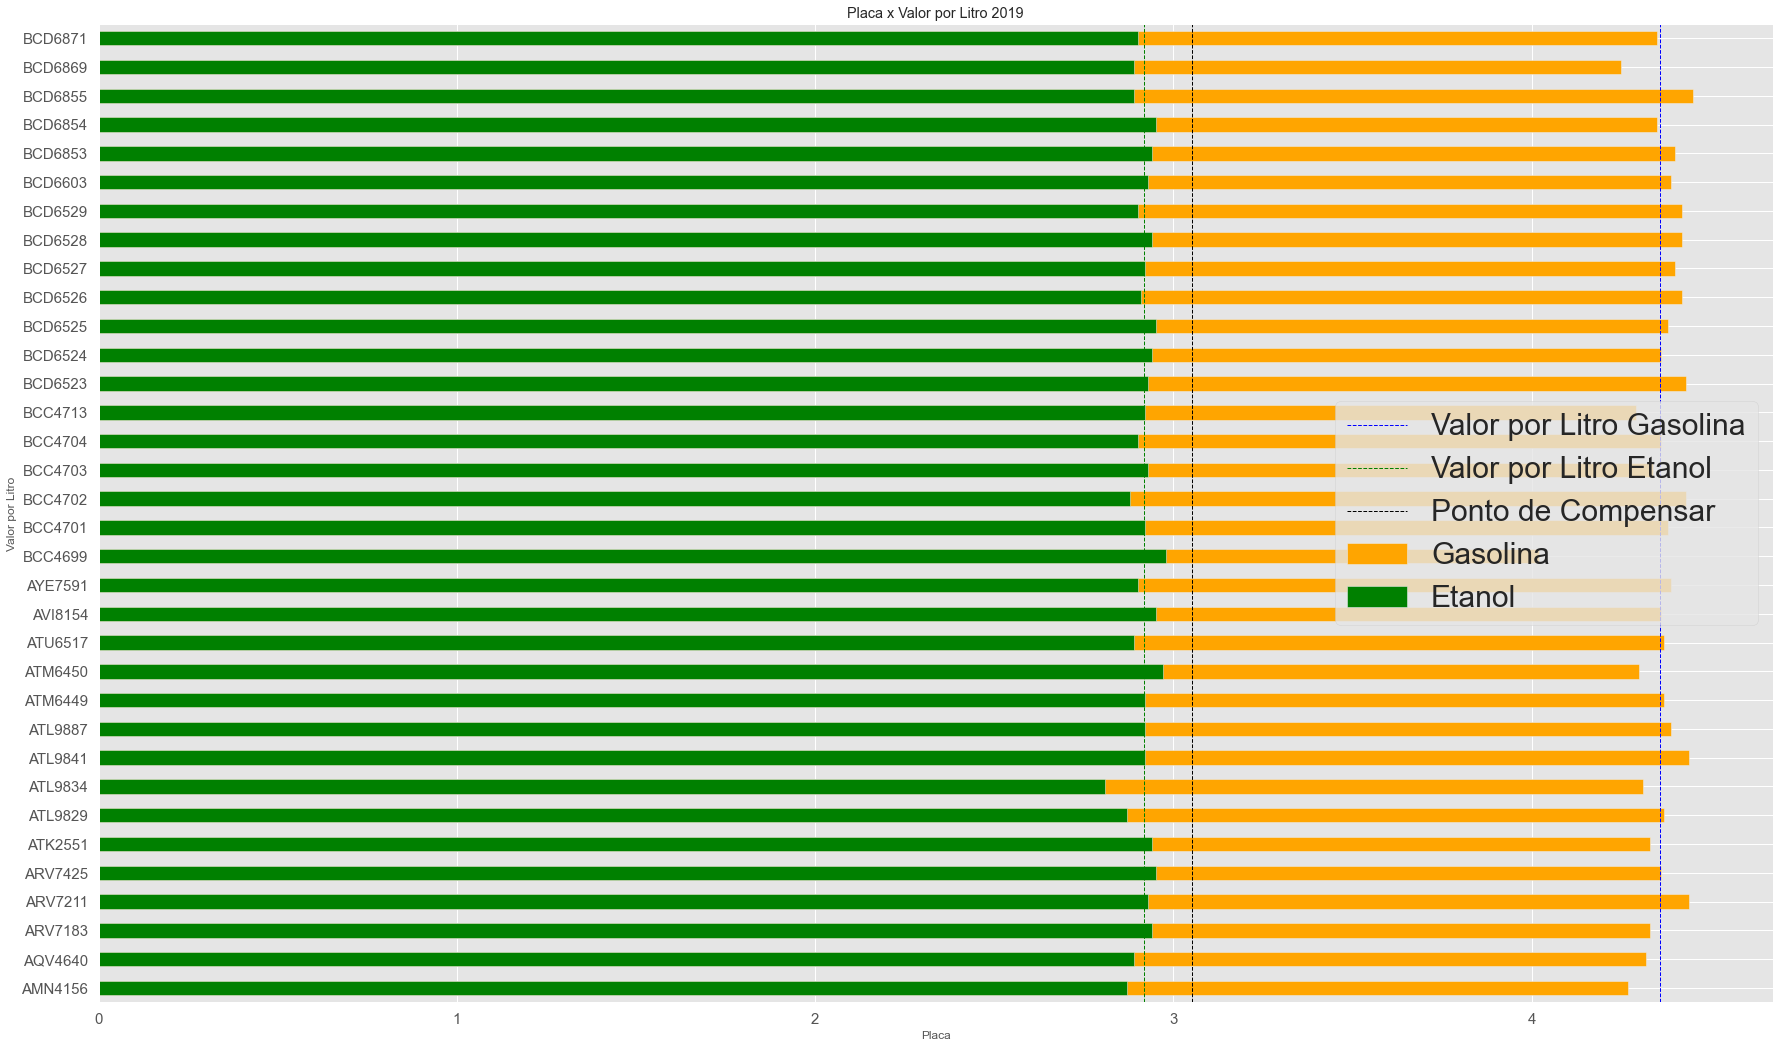

In [50]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='orange')
dftpe.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='green')

#set limits and labels
avggas = dftpg["Valor Litro"].mean()
ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axvline(worthGas, color='black', label='Média', linestyle='--', linewidth=1)

ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Gasolina', 'Etanol'])
ax.set(title='Placa x Valor por Litro 2019', xlabel='Placa', ylabel='Valor por Litro')
#ax1.legend(["Valor por Litro Gasolina", "Número de Litros Etanol"])
#ax1.set(title='Placa x Número de Litros 05/2019 Etanol', xlabel='Placa', ylabel='Número de Litros')

In [51]:
df["Produto"].value_counts()

GASOLINA    1190
ETANOL      1167
DIESEL       662
Name: Produto, dtype: int64

In [52]:
avgeta = dftpe["Valor Litro"].mean()
avgeta

2.917352941176471

In [53]:
df["Produto"].value_counts(normalize=True)

GASOLINA    0.394170
ETANOL      0.386552
DIESEL      0.219278
Name: Produto, dtype: float64

In [54]:
df["Tipo"].value_counts(normalize=True)

Abast     0.964227
Consum    0.035773
Name: Tipo, dtype: float64

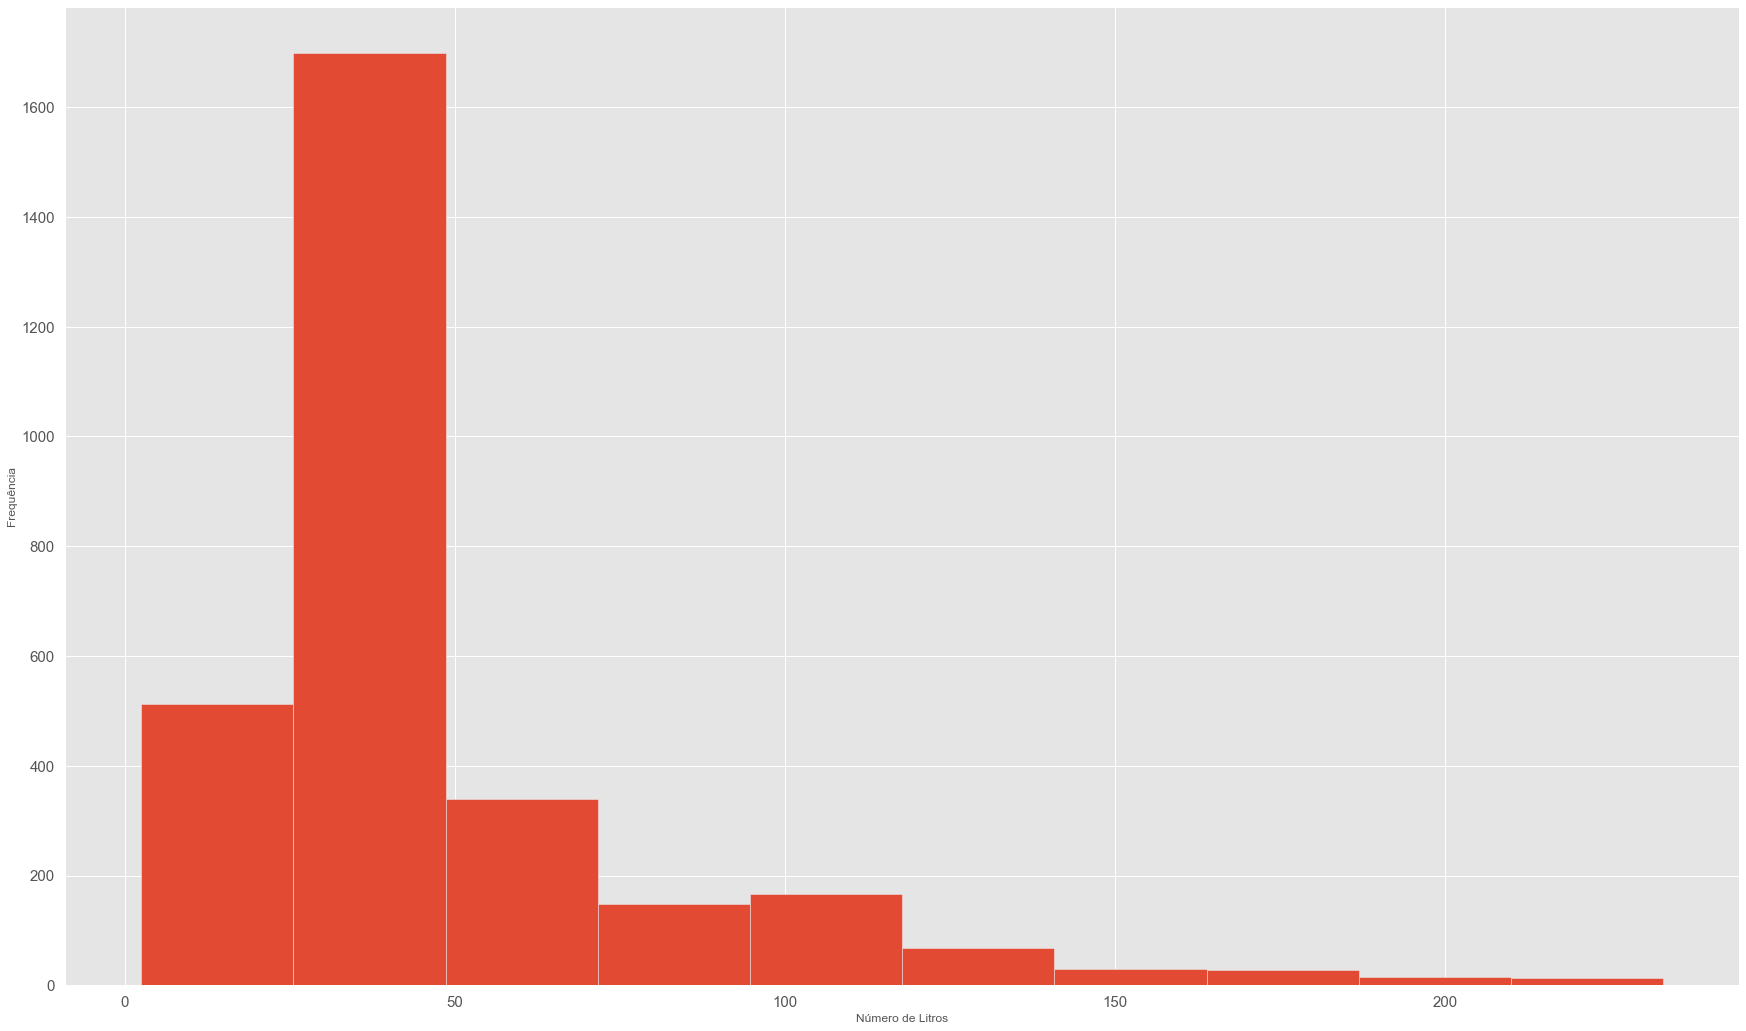

In [55]:
#Ploting
fig, ax = plt.subplots(1,1)
ax.hist(df["Nr Litros"])
ax.set_xlabel('Número de Litros')
ax.set_ylabel('Frequência')
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
plt.show()
#plt.savefig('frequencyLiters.png', dpi=100)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


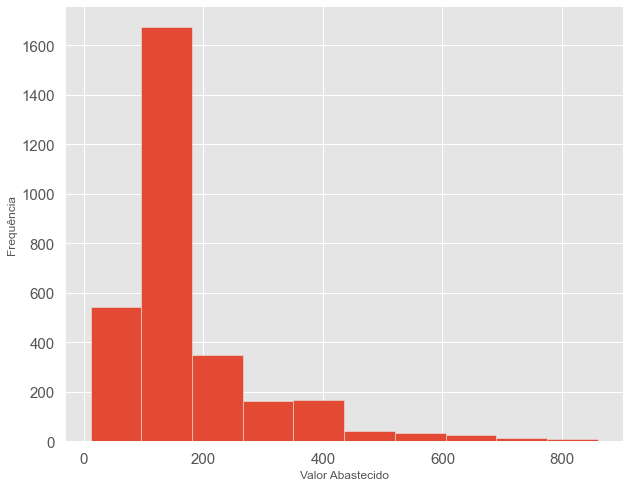

In [56]:
#Ploting
fig, ax = plt.subplots(1,1)
ax.hist(df["Valor Abast."])
ax.set_xlabel('Valor Abastecido')
ax.set_ylabel('Frequência')
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
#plt.savefig('frequencyValue.png', dpi=100)
plt.show()

In [57]:
df["Nr Litros"].describe()

count    3019.000000
mean       48.787708
std        33.946891
min         2.530000
25%        33.715500
50%        42.763000
75%        49.250500
max       233.030000
Name: Nr Litros, dtype: float64

<AxesSubplot:>

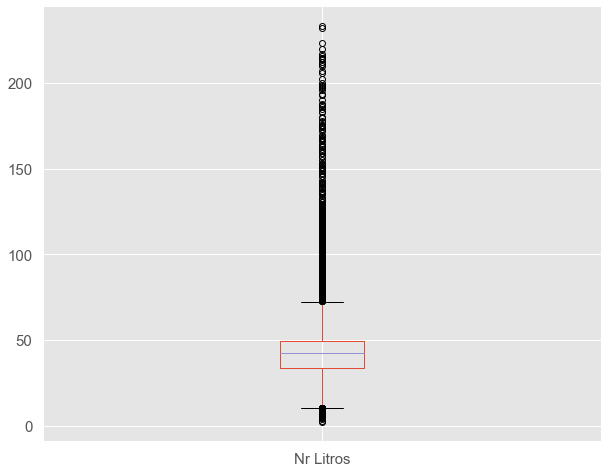

In [58]:
df["Nr Litros"].plot(kind="box")

<AxesSubplot:title={'center':'Valor Abast. x Nr Litros'}, xlabel='Valor Abast.', ylabel='Nr Litros'>

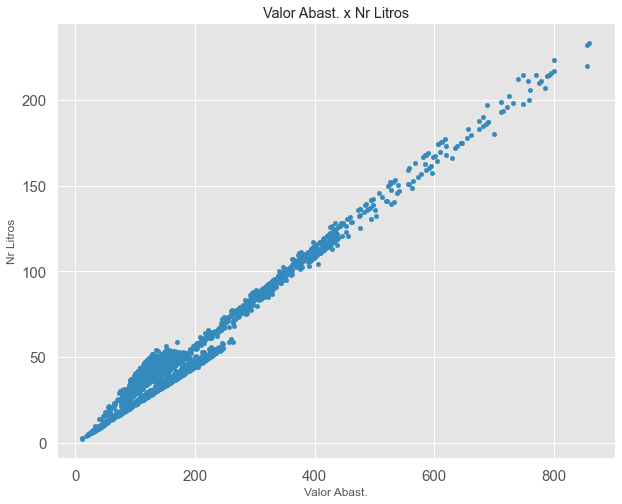

In [59]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

<AxesSubplot:title={'center':'Nr Litros'}, xlabel='Produto'>

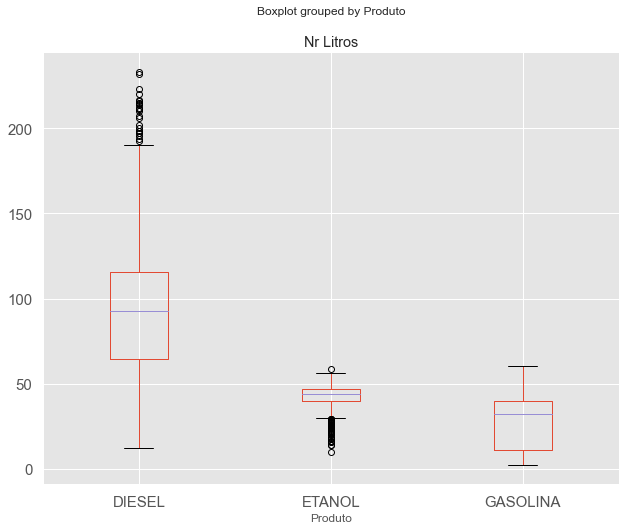

In [60]:
df.boxplot(column="Nr Litros", by="Produto")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Data'>

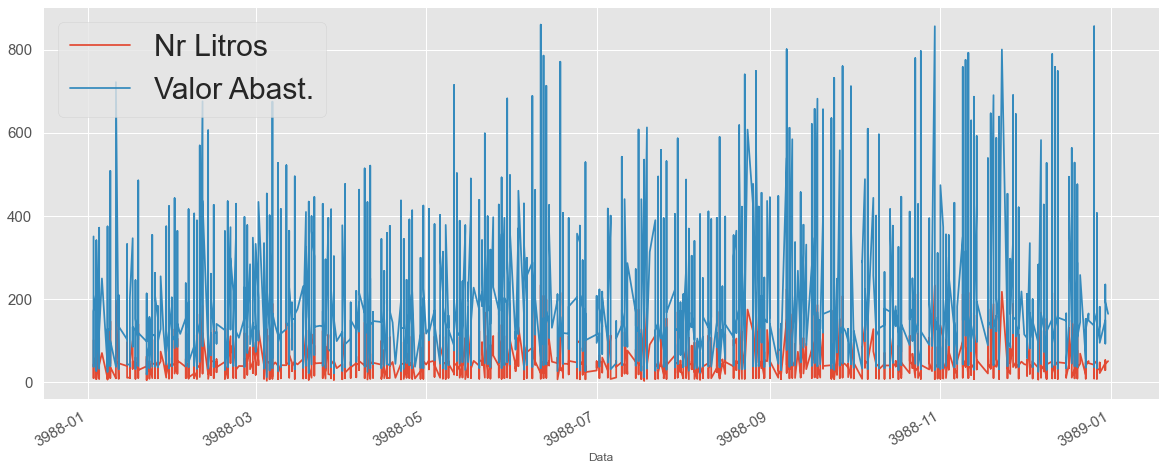

In [61]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

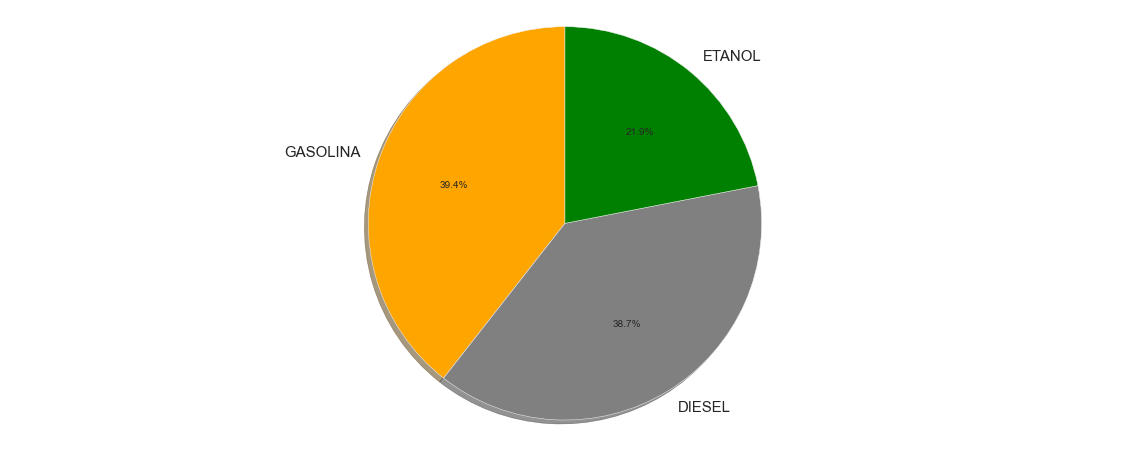

In [62]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90, colors=['orange', 'grey', 'green'])
ax1.axis('equal')
plt.show()

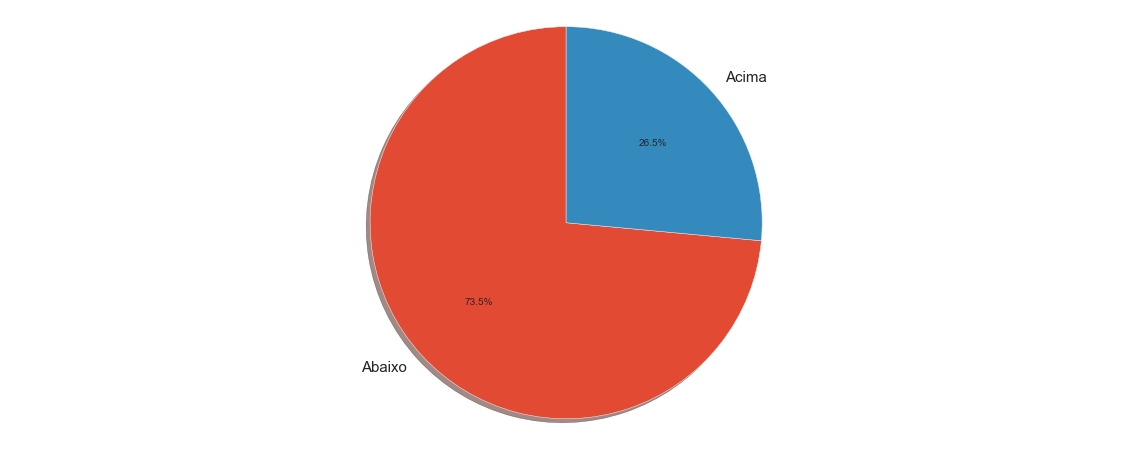

In [63]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

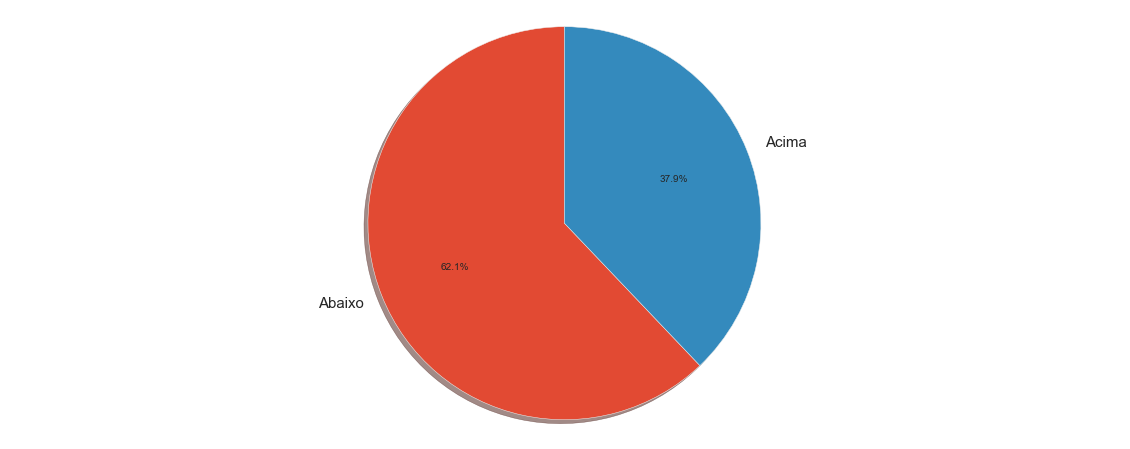

In [64]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

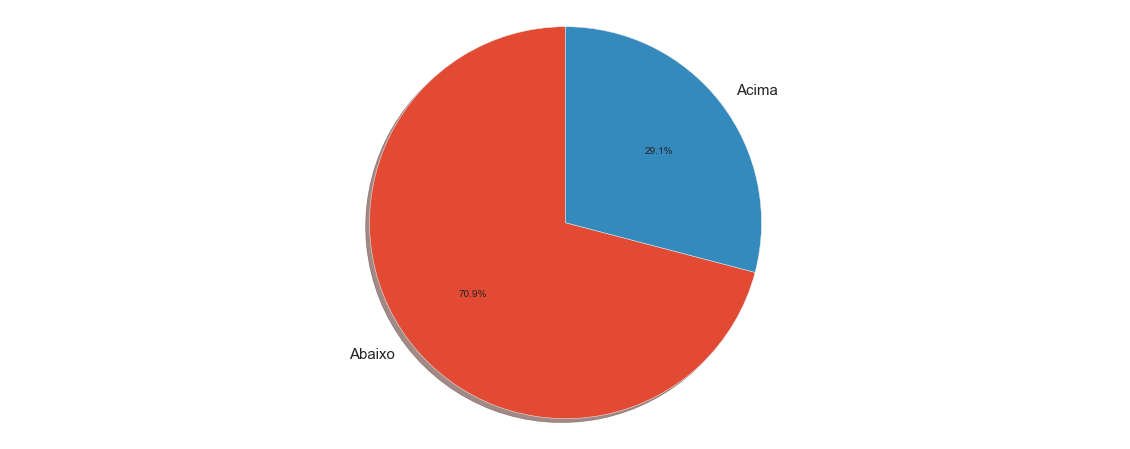

In [65]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


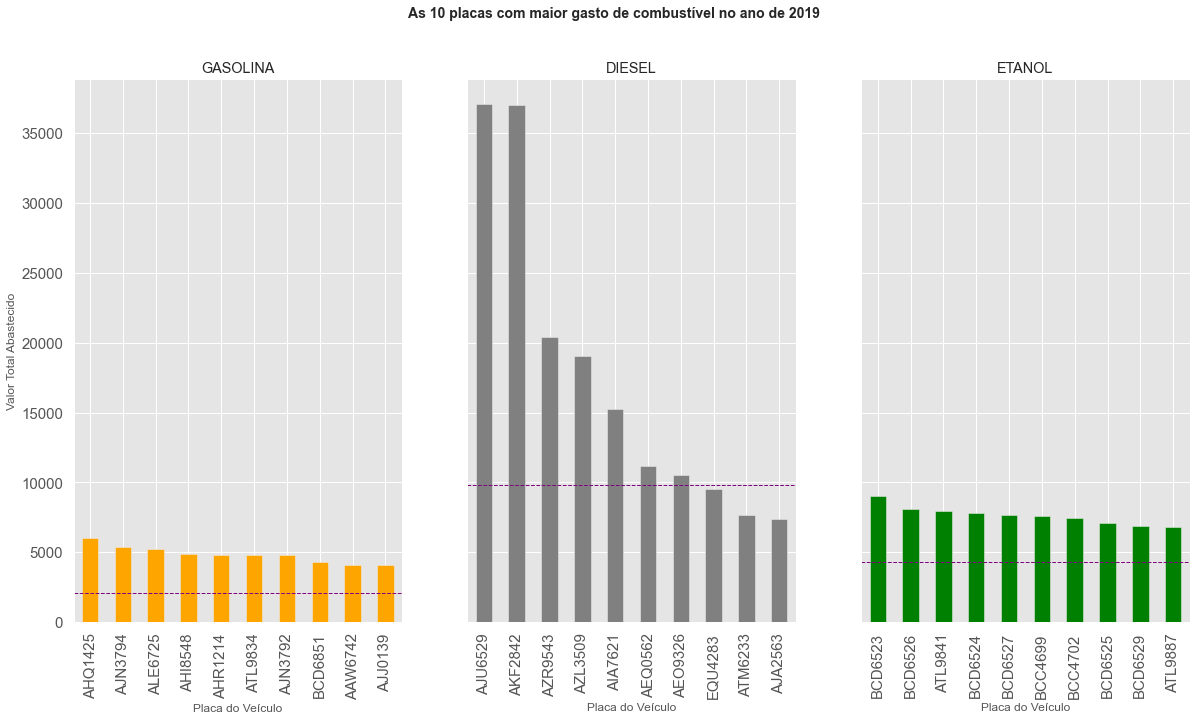

In [66]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

meanGas = df[df["Produto"] == "GASOLINA"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanGas = meanGas['Valor Abast.'].mean()

meanEtanol = df[df["Produto"] == "ETANOL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanEtanol = meanEtanol['Valor Abast.'].mean()

meanDiesel = df[df["Produto"] == "DIESEL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanDiesel = meanDiesel['Valor Abast.'].mean()

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)


#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0, color='orange')
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
ax0.axhline(meanGas, color='purple', label='Média', linestyle='--', linewidth=1)
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1, color='grey')
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
ax1.axhline(meanDiesel, color='purple', label='Média', linestyle='--', linewidth=1)
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2, color='green')
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')
ax2.axhline(meanEtanol, color='purple', label='Média', linestyle='--', linewidth=1)

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível no ano de 2019', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)
plt.savefig('top10Fuel.png', dpi=72)

In [67]:
meanGas = df[df["Produto"] == "GASOLINA"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanGas = meanGas['Valor Abast.'].mean()

meanEtanol = df[df["Produto"] == "ETANOL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanEtanol = meanEtanol['Valor Abast.'].mean()

meanDiesel = df[df["Produto"] == "DIESEL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanDiesel = meanDiesel['Valor Abast.'].mean()

meanDiesel

9831.024347826085

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


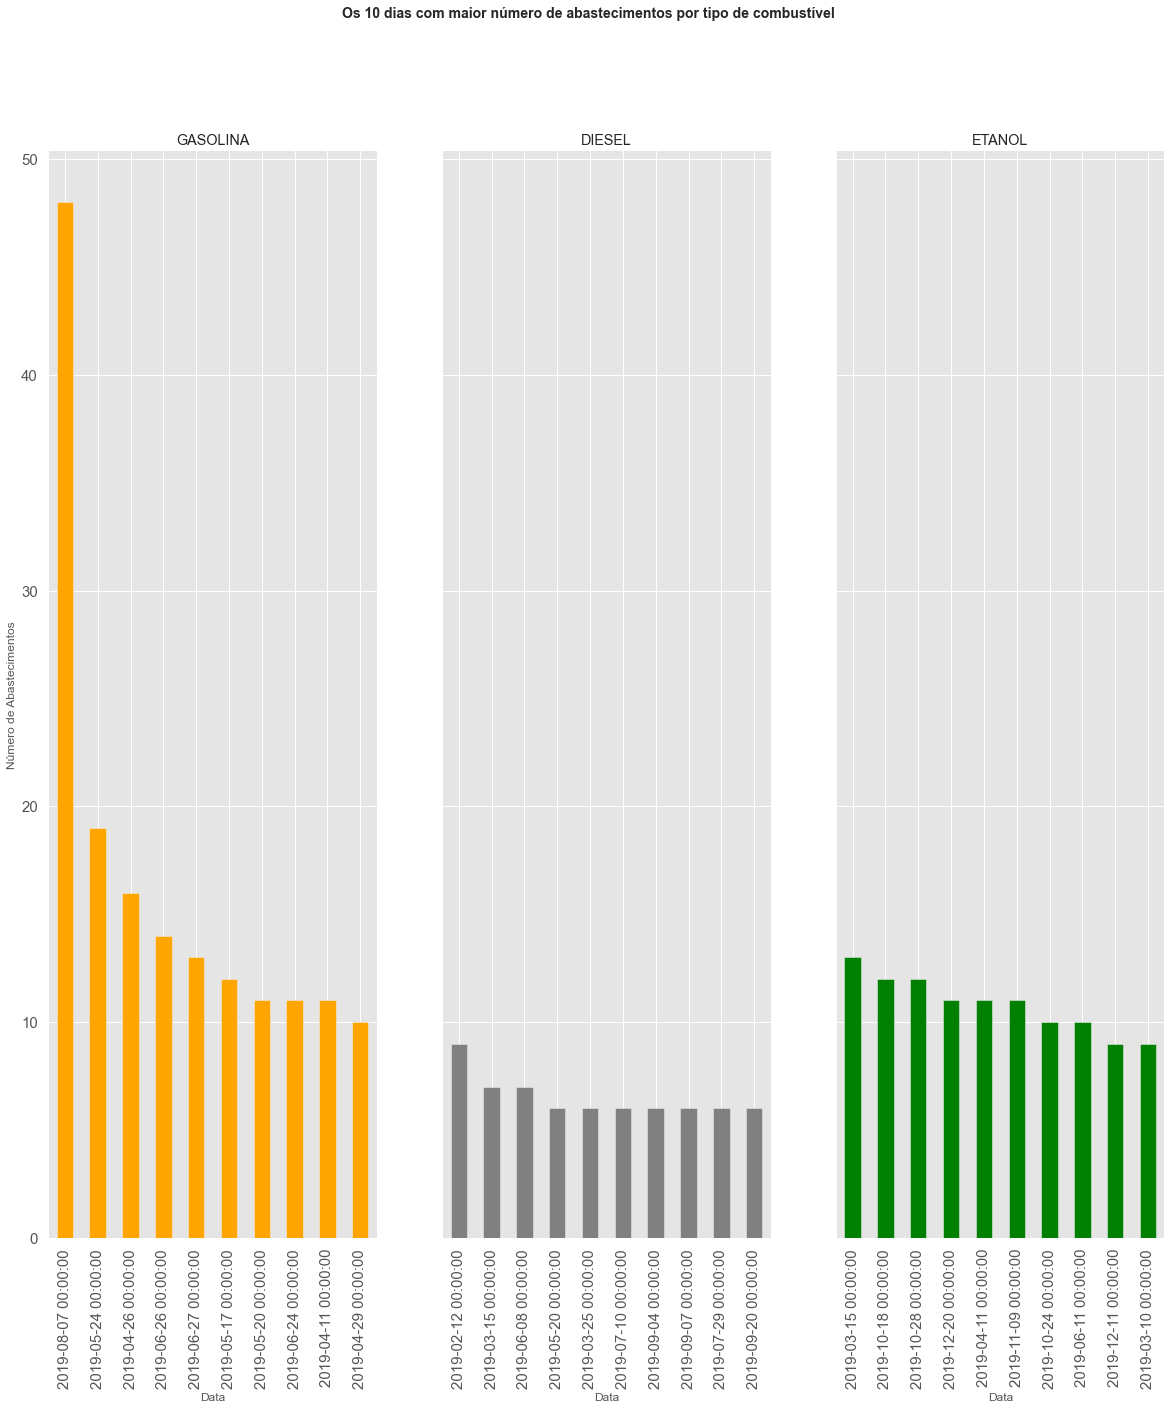

In [68]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 20))


#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0, color='orange')
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1, color='grey')
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2, color='green')
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
plt.savefig('top10Days.png', dpi=72)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


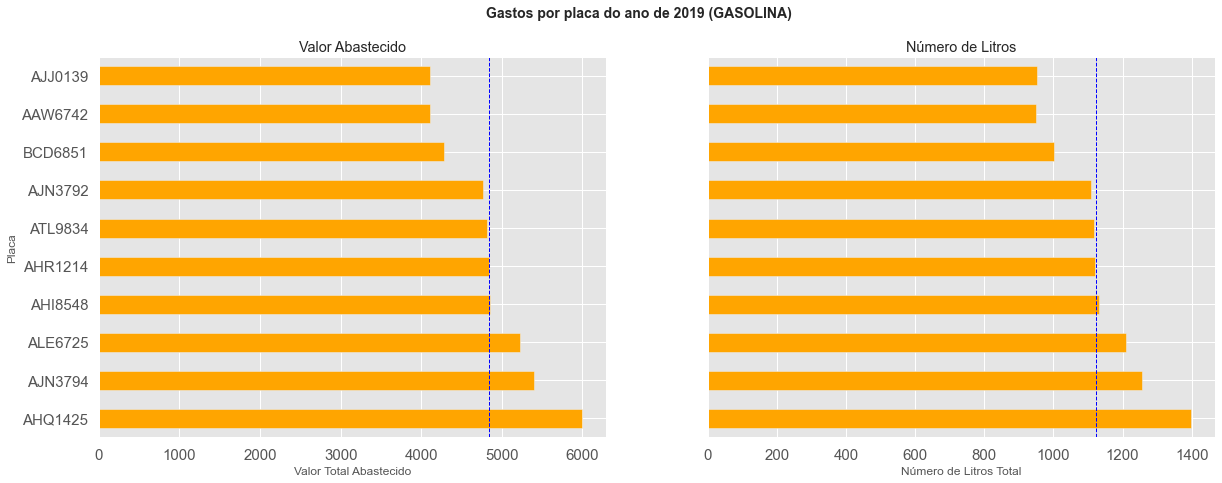

In [69]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='orange')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='orange')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


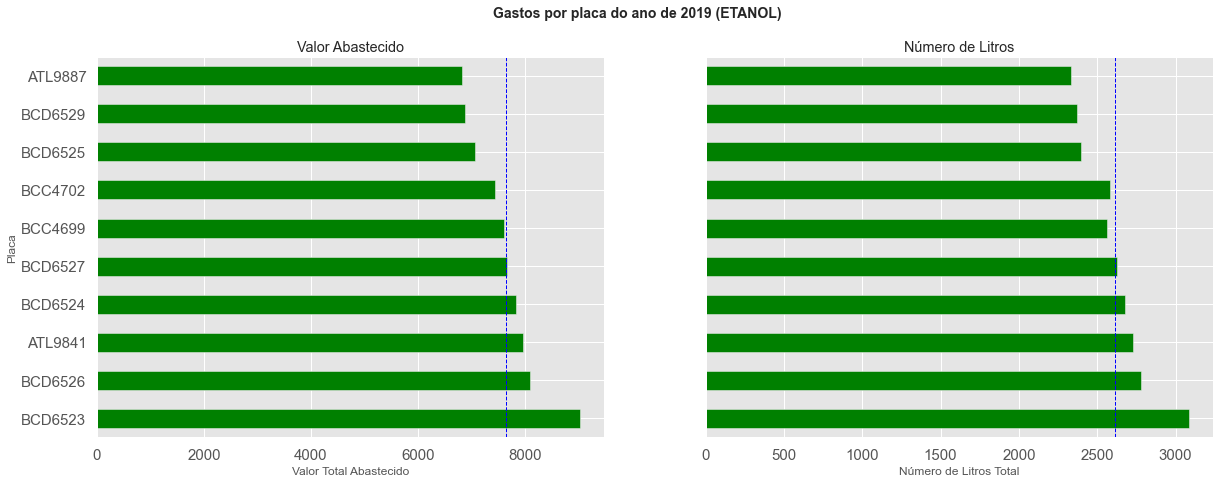

In [70]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='green')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='green')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


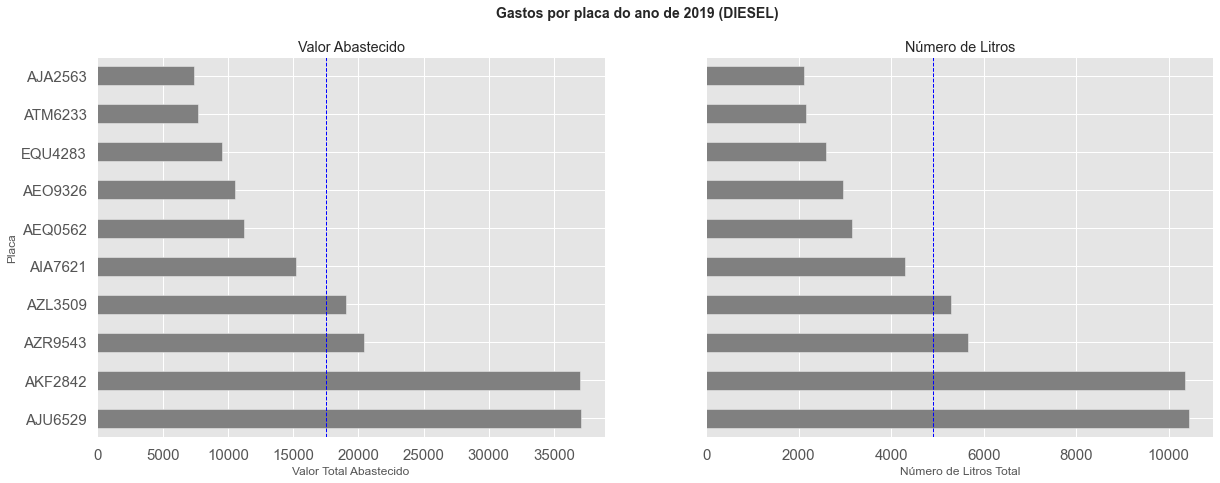

In [71]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='grey')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='grey')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


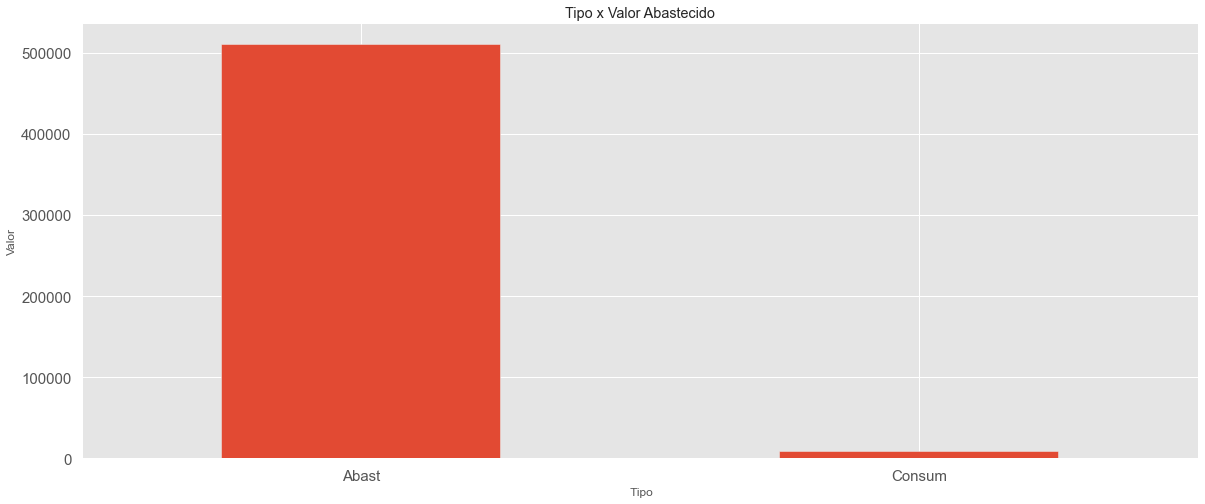

In [72]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


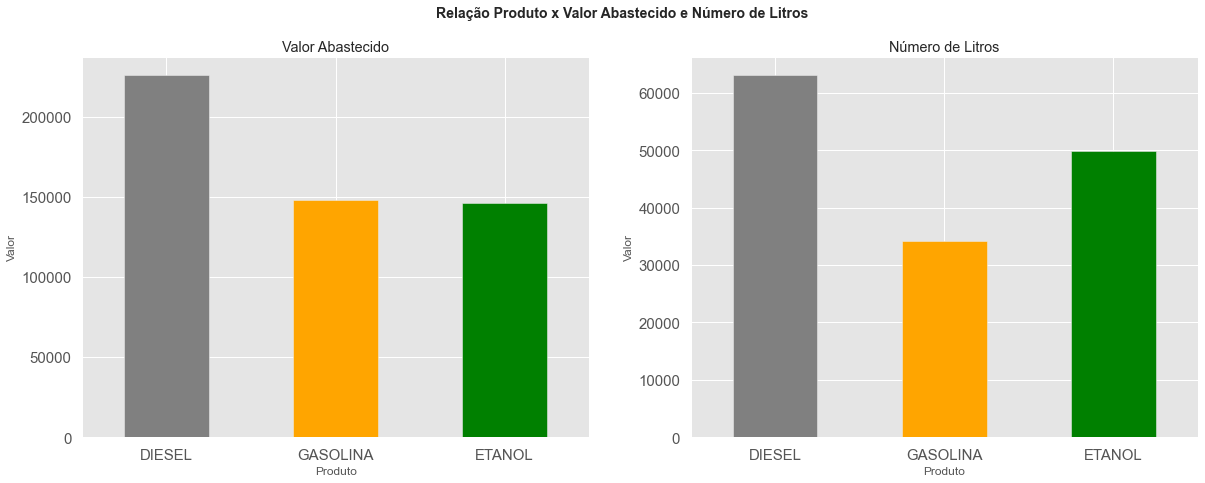

In [73]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'orange', 'green'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'orange', 'green'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


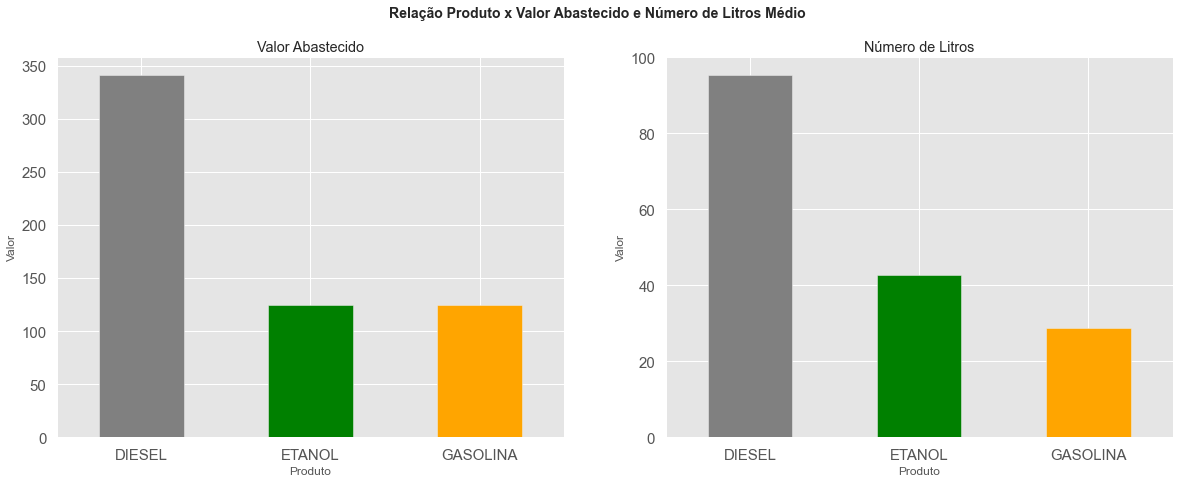

In [74]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'green', 'orange'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'green', 'orange'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


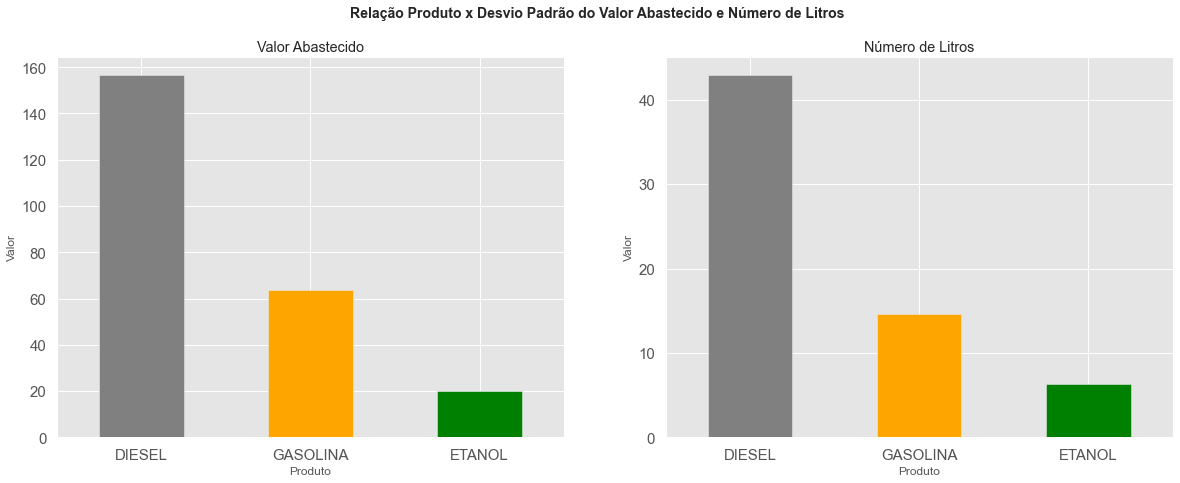

In [75]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'orange', 'green'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'orange', 'green'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)